# *KMPG SP-ROCKECT DATA ANANLYSIS PROJECT*
## by Abbey Christian Banafo

## Table of Contents

* [Introduction](#intro)
* [Business Problem Understanding](#bpu)
    * [Problem Statement](#ps)
    * [Hypothesis](#hs)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Methodology](#my)
* [Importing Data Modules](#imu)
* [Importing Data Files](#files)
* [Data Assessment And Cleaning](#dqa)
    * [DQA for Customer Demographics](#dqa1)
    * [DQA for Customer Address](#dqa2)
    * [DQA for Customer Transactions](#dqa3)
    * [DQA for New Customer List](#dqa4)
    * [Merging Datasets](#merg)
* [Exploratory Data Analysis](#eda)
    * [Univariate And Bivariate Exploration](#ubexpl)
    * [Multivariate Exploration](#mexpl)
* [Statistical Tests](#stat)
    * [t-test on male and female profits](#m_f_t-test)
        * [verifying equal variance](#v_eq_variance)
        * [verifying a normal residual distribution](#v_fp_mp_residual)
* [Relations Observed](#robs)
* [Interesting Findings](#intfin)
* [Conclusions](#concl)

## 1.0 Introduction<a id='intro'></a>

<p style="text-align:justify;">Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, we would have to recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.</p>

## 1. Business Problem Understanding<a id='bpu'></a>

<p style="text-align:justify;">The first step in approaching a data analysis problem is problem understanding. This step is very important since it allows us to know the kind of decisions we want to make, the information or data that will be needed to inform those decisions and finally, the kind of analysis that will be used to arrive at those decisions. In a nutshell, developing a mental model of the problem allows us to properly structure potentially relevant information needed to solve the problem.</p>

### 1.1 Problem Statement <a id='ps'></a>

<p style="text-align:justify;">Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has given us a new list of 1000 potential customers with their demographics and attributes. (However, these customers do not have prior transaction history with the organisation.)</p>

### 1.2 Hypothesis <a id='hs'></a>

<p style="text-align:justify;">It is possible to determine customers likely to purchase from sprocket. The hypothesis to be considered is that; Older people more likely to the generate much profit for the organization.</p>

### 1.3 Project Goal <a id='pg'></a>

<p style="text-align:justify;">The marketing team at Sprocket Central Pty Ltd want to know about useful customer insights which could help optimise resource allocation for targeted marketing hence, improve performance by focusing on high value customers.</p>

### 1.4 Information Needed <a id='in'></a>

<p style="text-align:justify;">In order to test the hypothesis of whether older people are more likely to generate much profit for the organization, we would need to perform statistical tests for the assumptions. We would therefore need to acquire the data needed to test the hypothesis and perform Exploratory Data Analysis to discover more insights about other factors that might affect sprockets profit acqusition, which will allow us to make plausible decisions.</p>

Sprocket provided us with the following data to be able to perform EDA and perform statistical Tests.
1. <p style="text-align:justify;"><b>Customer Demographics Data</b> - which included characteristics of each client, for example, age, job_title, job_industry, etc.</p>
2. <b>Customer Address Data</b> - Included customers address, postcode, state.
3. <p style="text-align:justify;"><b>Transaction Data</b> – which included past records of the purchases made by customers.</p>
4. <p style="text-align:justify;"><b>New Customer Data</b> – This includes records of potential clients who have no past records in terms of purchases</p>

### Methodolgy <a id='my'></a>
The methodology that will be used for our project will largely depend on the goals we set out to achieve
> * Once we have the data, We would assess the data based on quality and tidyness issues.
> * Based on our needs we may merge and join tables within the individual datasets.
> * Furthermore, we would explore the datasets using statistics visualization techniques.
> * We would then perform statistical analysis and make decisions based on statistical results.

### *Importing data modules*<a id='imu'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from datetime import date

pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns

### *Importing Data Files*<a id='files'></a>

In [2]:
# Importing main excel workbook
file_name = 'KPMG_VI_New_raw_data_update_final_2 - Copy.xlsx'

# Reading individual sheets within workbook
cust_demo = pd.read_excel(file_name, sheet_name='CustomerDemographic')
cust_address = pd.read_excel(file_name, sheet_name='CustomerAddress')
cust_transaction = pd.read_excel(file_name, sheet_name='Transactions')
new_cust = pd.read_excel(file_name, sheet_name='NewCustomerList')

D:\anaconda\envs\my_env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """
D:\anaconda\envs\my_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


## *Assessment and Cleaning of Data*<a id='dqa'></a>
> *The assessment strategy used in this phase is based on conceptually identifying and defining the problem after which we code and test the results*
> * *Define: Here we conceptually define the problem*
> * *Code: We solve the problem Identifies with a code*
> * *Test: We test the result of our code*

***Customer Demographic***<a id='dqa1'></a>
> *This dataset gives us information on the basic description on the information of custmers of sprocket.*

In [3]:
# taking a look at the customer demographic dataset
cust_demo.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
# general information about demographics data
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
# checking unique customer id's present
cust_demo.customer_id.nunique()

4000

In [6]:
# checking number of null values in last_name column
len(cust_demo.last_name[cust_demo.last_name.isnull() == True])

125

*We would want to leave this as first names looks complete hence could take care of that*

In [7]:
cust_demo.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

*Issues of **data quality** in the form of **inconsistent naming** of our values in the gender column. We would thus want to replace with appropriate names remove those not needed if any*

In [8]:
# replace inconsistent gender names in gender column
cust_demo = cust_demo.replace({'gender':{'F':'Female', 'Femal':'Female', 'M':'Male'}})

# # drop U in gender column
# cust_demo.drop(cust_demo.index[cust_demo['gender'] == 'U'], inplace = True)

In [9]:
# checking unique gender types in data
cust_demo.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

*Extract age from **DOB** column*
> *Create a function to extract age from the Date of Birth Column*

In [10]:
# exract age into date of birth
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [11]:
# extract age for DOB column
cust_demo['age'] = cust_demo['DOB'].apply(calculate_age)
cust_demo['age'].head()

0    68.0
1    41.0
2    68.0
3    60.0
4    45.0
Name: age, dtype: float64

In [12]:
# dropping ages greater than 100
cust_demo.drop(cust_demo.loc[cust_demo['age'] > 100].index, inplace=True)

In [13]:
# verifying changes made
cust_demo.age[cust_demo['age'] > 100]

Series([], Name: age, dtype: float64)

In [14]:
# #  setting up age group
# # the between method is inclusive
# cust_demo.loc[cust_demo['age'].between(0,19), 'age_group'] = '0-19'
# cust_demo.loc[cust_demo['age'].between(20,29), 'age_group'] = '20-29' 
# cust_demo.loc[cust_demo['age'].between(30,39), 'age_group'] = '30-39'
# cust_demo.loc[cust_demo['age'].between(40,49), 'age_group'] = '40-49'
# cust_demo.loc[cust_demo['age'].between(50,59), 'age_group'] = '50-59'
# cust_demo.loc[cust_demo['age'] > 59, 'age_group'] = '60+'

In [15]:
age_column = cust_demo.pop('age')
# age_group_column = cust_demo.pop('age_group')

# putting age and age_group column just after dob column
cust_demo.insert(6, 'age', age_column)
# cust_demo.insert(7, 'age_group', age_group_column)

# verifying changes made
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,41.0,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,68.0,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,60.0,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,45.0,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [16]:
# dropping null values from the job_title column
cust_demo.dropna(subset=['job_title'], inplace=True)

In [17]:
# verifying the droped rows
len(cust_demo[cust_demo.job_title.isnull()])

0

In [18]:
len(cust_demo.job_industry_category[cust_demo.job_industry_category.isnull()==True])

551

In [19]:
# dropping null values in job industry category
cust_demo.dropna(subset=['job_industry_category'], inplace=True)

# verifying changes made
len(cust_demo.job_industry_category[cust_demo.job_industry_category.isnull()==True])

0

In [20]:
cust_demo.deceased_indicator.value_counts()

N    2940
Y       2
Name: deceased_indicator, dtype: int64

In [21]:
# dropping deceased persons from data
cust_demo.drop(cust_demo.loc[cust_demo['deceased_indicator']=='Y'].index, inplace=True)

In [22]:
# verifying changes made
cust_demo[cust_demo['deceased_indicator']=='Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


*Default Column seems irrelevant in our quest thus we would want to drop them*

In [23]:
# dropping the default column
cust_demo.drop(['default'], axis=1, inplace=True)

In [24]:
# verifying change
cust_demo.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [25]:
# checking for null values in tenure column
len(cust_demo.tenure[cust_demo.tenure.isnull()==True])

78

In [26]:
# dropping null values in the tenure column
cust_demo.dropna(subset=['tenure'], inplace=True)

# verifying changes made
len(cust_demo.tenure[cust_demo.tenure.isnull()==True])

0

In [27]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2862 non-null   int64         
 1   first_name                           2862 non-null   object        
 2   last_name                            2777 non-null   object        
 3   gender                               2862 non-null   object        
 4   past_3_years_bike_related_purchases  2862 non-null   int64         
 5   DOB                                  2862 non-null   datetime64[ns]
 6   age                                  2862 non-null   float64       
 7   job_title                            2862 non-null   object        
 8   job_industry_category                2862 non-null   object        
 9   wealth_segment                       2862 non-null   object        
 10  deceased_ind

***Customer Address***<a id='dqa2'></a>
> *The datset informs us on the location of the customers in the organization*

In [28]:
# checking out the customer's address dataset
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [29]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [30]:
cust_address.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

*Issues in terms of **quality of data with inconsistent naming of the values** in the states column. Replace New South Wales with NSW and Victoria with VIC*

In [31]:
# replace new south wales and victoria with NSW and VIC
cust_address = cust_address.replace({'state':{'New South Wales':'NSW', 'Victoria':'VIC'}})

# verifying changes made
cust_address.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [32]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


***Transactions***<a id='dqa3'></a>
> *The dataset here informs us on the transactional history customers of the organization*

In [33]:
# Quick look at transaction dataset
cust_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [34]:
cust_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

*Issues regarding **unequal number of records for columns as well as in correct datatpes** for some columns(**product_first_sold_date**)*

In [35]:
len(cust_transaction.online_order[cust_transaction.online_order.isnull()])

360

In [36]:
cust_transaction.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [37]:
# dropping null values in online order column
cust_transaction.dropna(subset=['online_order'], inplace=True)

In [38]:
len(cust_transaction.online_order[cust_transaction.online_order.isnull()])

0

In [39]:
len(cust_transaction.brand[cust_transaction.brand.isnull()])

195

In [40]:
# dropping null values in brand column
cust_transaction.dropna(subset=['brand'], inplace=True)

In [41]:
# verifying change
len(cust_transaction.brand[cust_transaction.brand.isnull()])

0

In [42]:
cust_transaction.product_line.value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [43]:
len(cust_transaction.product_line[cust_transaction.product_line.isnull()])

0

In [44]:
cust_transaction.product_class.value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [45]:
len(cust_transaction.product_class[cust_transaction.product_class.isnull()])

0

In [46]:
cust_transaction.product_size.value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [47]:
len(cust_transaction.product_size[cust_transaction.product_size.isnull()])

0

In [48]:
len(cust_transaction.standard_cost[cust_transaction.standard_cost.isnull()])

0

In [49]:
len(cust_transaction.product_first_sold_date[cust_transaction.product_first_sold_date.isnull()])

0

In [50]:
# convertion to datetime dtype
cust_transaction['product_first_sold_date'] = pd.to_datetime(cust_transaction['product_first_sold_date'])

In [51]:
# create a column for profit
cust_transaction['profit'] = cust_transaction['list_price'] - cust_transaction['standard_cost']

In [52]:
profit_column = cust_transaction.pop('profit')

# putting profit column after standard cost
cust_transaction.insert(len(cust_transaction.columns)-1, 'profit', profit_column)

cust_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,1970-01-01 00:00:00.000041245
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,1970-01-01 00:00:00.000041701
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1970-01-01 00:00:00.000036361
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1970-01-01 00:00:00.000036145
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,1970-01-01 00:00:00.000042226


In [53]:
cust_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  profit                   19445 n

***New Customer List***<a id='dqa4'></a>
> *This is the dataset the organization intends to obtain its new customers from. Results from analysis of the much older data could help the industry to determine which of these clients should be target more in terms of advertisement to ensure great value is gained from resources used*

In [188]:
# A look at the new customer list
new_cust.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,4000,Chickie,Brister,Male,86,1957-07-12,65.0,60+,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
1,4001,Morly,Genery,Male,69,1970-03-22,52.0,50-59,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
2,4002,Ardelis,Forrester,Female,10,1974-08-28,48.0,40-49,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5


In [189]:
# new_cust.columns
new_cust.shape

(735, 19)

In [56]:
# Brief information about new dataset
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

> * *Inconsistent number of recoreds for columns*
> * *The **new customer list seems not to have a customer id** column hence we would want to generate that as is seems to be integer values given to each customer. Hence we would want to continue from the last known customer then add the total number of customers we have in our new list.*
> * *We would also want a **create the age column we created earlier** on using the DOB column*

In [57]:
# generating customer_id for the new customers
new_cust['customer_id'] = np.arange(4000,5000) # continuing customer id's from existing 20,000 people

# extract age for DOB column
new_cust['age'] = new_cust['DOB'].apply(calculate_age)

# dropping null values from the age column
new_cust.dropna(subset=['age'], inplace=True)

new_cust['age'].sample(5)

921    31.0
76     61.0
822    55.0
700    41.0
853    80.0
Name: age, dtype: float64

In [58]:
# dropping ages greater than 100
new_cust.drop(new_cust.loc[new_cust['age'] > 100].index, inplace=True)

# verifying changes made
new_cust.age[new_cust['age'] > 100]

Series([], Name: age, dtype: float64)

In [59]:
#  setting up age group
# the between method is inclusive
new_cust.loc[new_cust['age'].between(0,19), 'age_group'] = '0-19'
new_cust.loc[new_cust['age'].between(20,29), 'age_group'] = '20-29' 
new_cust.loc[new_cust['age'].between(30,39), 'age_group'] = '30-39'
new_cust.loc[new_cust['age'].between(40,49), 'age_group'] = '40-49'
new_cust.loc[new_cust['age'].between(50,59), 'age_group'] = '50-59'
new_cust.loc[new_cust['age'] > 59, 'age_group'] = '60+'

In [60]:
# Re arranging age column in dataset

age_group_column = new_cust.pop('age_group')
age_col = new_cust.pop('age')
cus_id_col = new_cust.pop('customer_id')

# repositioning customer_id, age_group and age columns
new_cust.insert(0, 'customer_id', cus_id_col)
new_cust.insert(6, 'age', age_col)
new_cust.insert(7, 'age_group', age_group_column)

# verifying change
new_cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,4000,Chickie,Brister,Male,86,1957-07-12,65.0,60+,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.45,0.5625,0.703125,0.597656,1,1,1.718750
1,4001,Morly,Genery,Male,69,1970-03-22,52.0,50-59,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.91,0.9100,1.137500,0.966875,1,1,1.718750
2,4002,Ardelis,Forrester,Female,10,1974-08-28,48.0,40-49,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.76,0.7600,0.760000,0.760000,1,1,1.718750
3,4003,Lucine,Stutt,Female,64,1979-01-28,43.0,40-49,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.42,0.5250,0.525000,0.525000,4,4,1.703125
4,4004,Melinda,Hadlee,Female,34,1965-09-21,56.0,50-59,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,1.01,1.0100,1.262500,1.262500,4,4,1.703125


In [61]:
# check number of null values in job_title and job_industry_category
len(new_cust.job_title[new_cust.job_title.isnull()]), len(new_cust.job_industry_category[new_cust.job_industry_category.isnull()])

(105, 165)

In [62]:
# dropping null values from the job_title column
new_cust.dropna(subset=['job_title'], inplace=True)

# dropping null values from the job_industry_category column
new_cust.dropna(subset=['job_industry_category'], inplace=True)

In [63]:
# verify changes made
len(new_cust.job_title[new_cust.job_title.isnull()]), len(new_cust.job_industry_category[new_cust.job_industry_category.isnull()])

(0, 0)

In [64]:
# dropping unwanted columns from new customer list
new_cust = new_cust.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'], axis=1)

In [65]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          735 non-null    int32         
 1   first_name                           735 non-null    object        
 2   last_name                            715 non-null    object        
 3   gender                               735 non-null    object        
 4   past_3_years_bike_related_purchases  735 non-null    int64         
 5   DOB                                  735 non-null    datetime64[ns]
 6   age                                  735 non-null    float64       
 7   age_group                            735 non-null    object        
 8   job_title                            735 non-null    object        
 9   job_industry_category                735 non-null    object        
 10  wealth_segment

### *Extracting customer Demographic and address from new customer list*

In [66]:
# extract customer demograghic data from the new customer list data
new_cust_demo = new_cust.drop(['address', 'postcode', 'state', 'country',
       'property_valuation'], axis=1)

new_cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,4000,Chickie,Brister,Male,86,1957-07-12,65.0,60+,General Manager,Manufacturing,Mass Customer,N,Yes,14
1,4001,Morly,Genery,Male,69,1970-03-22,52.0,50-59,Structural Engineer,Property,Mass Customer,N,No,16
2,4002,Ardelis,Forrester,Female,10,1974-08-28,48.0,40-49,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10
3,4003,Lucine,Stutt,Female,64,1979-01-28,43.0,40-49,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5
4,4004,Melinda,Hadlee,Female,34,1965-09-21,56.0,50-59,Financial Analyst,Financial Services,Affluent Customer,N,No,19


In [67]:
new_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          735 non-null    int32         
 1   first_name                           735 non-null    object        
 2   last_name                            715 non-null    object        
 3   gender                               735 non-null    object        
 4   past_3_years_bike_related_purchases  735 non-null    int64         
 5   DOB                                  735 non-null    datetime64[ns]
 6   age                                  735 non-null    float64       
 7   age_group                            735 non-null    object        
 8   job_title                            735 non-null    object        
 9   job_industry_category                735 non-null    object        
 10  wealth_segment

In [68]:
# extract customer address from new_cust data
new_cust_address = new_cust[['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation']].copy()
new_cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,4000,45 Shopko Center,4500,QLD,Australia,6
1,4001,14 Mccormick Park,2113,NSW,Australia,11
2,4002,5 Colorado Crossing,3505,VIC,Australia,5
3,4003,207 Annamark Plaza,4814,QLD,Australia,1
4,4004,115 Montana Place,2093,NSW,Australia,9


In [69]:
new_cust_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         735 non-null    int32 
 1   address             735 non-null    object
 2   postcode            735 non-null    int64 
 3   state               735 non-null    object
 4   country             735 non-null    object
 5   property_valuation  735 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 37.3+ KB


## *Merging three main datasets (demograhic, transaction, address)*<a id='merg'></a>
>* *Combine all three data sets together to form on giant table for the analysis*
>* *Using how equivalent to **"inner"** ensures the **"on"** parameter used would be present in both datasets*

In [70]:
# combining customer demographic and customer address table
demo_address_merged = pd.merge(cust_demo, cust_address, how='inner', on='customer_id') # inner ensures customer id's used are pressent in both tables
demo_address_merged.head(200)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,41.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,Female,97,1973-03-10,49.0,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023,NSW,Australia,12
3,12,Sawyere,Flattman,Male,58,1994-07-21,28.0,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,Gabriele,Norcross,Male,38,1955-02-15,67.0,Developer I,Financial Services,High Net Worth,N,Yes,8.0,2 Sutherland Street,3799,VIC,Australia,6
5,14,Rayshell,Kitteman,Female,85,1983-03-25,39.0,Account Executive,Financial Services,Affluent Customer,N,No,6.0,9 Mcbride Trail,2760,NSW,Australia,8
6,15,Erroll,Radage,Male,91,2000-07-13,22.0,Junior Executive,Manufacturing,Mass Customer,N,No,1.0,9861 New Castle Avenue,2428,NSW,Australia,9
7,19,Sorcha,Keyson,Female,76,2001-04-15,21.0,Geological Engineer,Manufacturing,High Net Worth,N,No,1.0,59 Spaight Circle,2233,NSW,Australia,9
8,20,Basile,Firth,Male,72,1980-08-13,42.0,Project Manager,Manufacturing,Mass Customer,N,No,11.0,032 Bartelt Crossing,2444,NSW,Australia,8
9,21,Mile,Cammocke,Male,74,1980-09-20,41.0,Safety Technician I,Manufacturing,Affluent Customer,N,Yes,16.0,18 Jenna Center,2650,NSW,Australia,7


In [71]:
# combining customer demographic, address and transaction table
demo_address_trans_merged = pd.merge(demo_address_merged, cust_transaction, how='inner', on='customer_id')
demo_address_trans_merged.head(200)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56,1970-01-01 00:00:00.000038482
1,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,751.02,1970-01-01 00:00:00.000039526
2,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28,1970-01-01 00:00:00.000037823
3,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10,1970-01-01 00:00:00.000037873
4,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,1970-01-01 00:00:00.000038573
5,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,13644,25,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,709.34,1970-01-01 00:00:00.000033552
6,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,14486,23,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,75.75,1970-01-01 00:00:00.000033455
7,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,14931,31,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,57.73,1970-01-01 00:00:00.000037337
8,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,15663,32,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,431.33,1970-01-01 00:00:00.000040618
9,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,16423,9,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,75.14,1970-01-01 00:00:00.000037838


In [72]:
demo_address_trans_merged.shape

(14046, 31)

In [73]:
demo_address_trans_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14046 entries, 0 to 14045
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          14046 non-null  int64         
 1   first_name                           14046 non-null  object        
 2   last_name                            13620 non-null  object        
 3   gender                               14046 non-null  object        
 4   past_3_years_bike_related_purchases  14046 non-null  int64         
 5   DOB                                  14046 non-null  datetime64[ns]
 6   age                                  14046 non-null  float64       
 7   job_title                            14046 non-null  object        
 8   job_industry_category                14046 non-null  object        
 9   wealth_segment                       14046 non-null  object        
 10  deceased_i

In [74]:
#  setting up age group
# the between method is inclusive
demo_address_trans_merged.loc[demo_address_trans_merged['age'].between(0,19), 'age_group'] = '0-19'
demo_address_trans_merged.loc[demo_address_trans_merged['age'].between(20,29), 'age_group'] = '20-29' 
demo_address_trans_merged.loc[demo_address_trans_merged['age'].between(30,39), 'age_group'] = '30-39'
demo_address_trans_merged.loc[demo_address_trans_merged['age'].between(40,49), 'age_group'] = '40-49'
demo_address_trans_merged.loc[demo_address_trans_merged['age'].between(50,59), 'age_group'] = '50-59'
demo_address_trans_merged.loc[demo_address_trans_merged['age'] > 59, 'age_group'] = '60+'

In [75]:
age_group_column = demo_address_trans_merged.pop('age_group')

# putting age and age_group column just after dob column
demo_address_trans_merged.insert(7, 'age_group', age_group_column)

# verifying changes made
demo_address_trans_merged.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,68.0,60+,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56,1970-01-01 00:00:00.000038482


In [76]:
demo_address_trans_merged.age_group.value_counts()

40-49    4862
50-59    2503
30-39    2441
20-29    2232
60+      2008
Name: age_group, dtype: int64

In [77]:
demo_address_trans_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14046 entries, 0 to 14045
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          14046 non-null  int64         
 1   first_name                           14046 non-null  object        
 2   last_name                            13620 non-null  object        
 3   gender                               14046 non-null  object        
 4   past_3_years_bike_related_purchases  14046 non-null  int64         
 5   DOB                                  14046 non-null  datetime64[ns]
 6   age                                  14046 non-null  float64       
 7   age_group                            14046 non-null  object        
 8   job_title                            14046 non-null  object        
 9   job_industry_category                14046 non-null  object        
 10  wealth_seg

In [78]:
# convert online_order to int type data first then to string and age to int
demo_address_trans_merged.online_order = demo_address_trans_merged.online_order.astype(int)
demo_address_trans_merged.age = demo_address_trans_merged.age.astype(int)

# function to convert to string
def to_string(df,column):
     df[column] = df[column].astype(str)

# convert to string
cols = ['transaction_id', 'customer_id', 'product_id', 'postcode', 'online_order']
for column in cols:
    to_string(demo_address_trans_merged, column)


# function to convert to category
def to_category(df,column):
    df[column] = pd.Categorical(df[column])

# convert to categorical
columns = ['gender', 'age_group', 'state', 'job_title', 'job_industry_category', 'wealth_segment', 
           'order_status', 'brand', 'online_order', 'product_line', 'product_class', 'product_size']
for col in columns:
    to_category(demo_address_trans_merged,col)


In [79]:
demo_address_trans_merged.age_group.value_counts()

40-49    4862
50-59    2503
30-39    2441
20-29    2232
60+      2008
Name: age_group, dtype: int64

In [80]:
# verifying change
demo_address_trans_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14046 entries, 0 to 14045
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          14046 non-null  object        
 1   first_name                           14046 non-null  object        
 2   last_name                            13620 non-null  object        
 3   gender                               14046 non-null  category      
 4   past_3_years_bike_related_purchases  14046 non-null  int64         
 5   DOB                                  14046 non-null  datetime64[ns]
 6   age                                  14046 non-null  int32         
 7   age_group                            14046 non-null  category      
 8   job_title                            14046 non-null  category      
 9   job_industry_category                14046 non-null  category      
 10  wealth_seg

## # *Rearranging columns*
> *Numeric type columns appearing first enables easier access* 

In [81]:
# rearranging columns
demo_address_trans_merged = demo_address_trans_merged[['transaction_id', 'customer_id', 'product_id', 'first_name',
                                                       'last_name', 'gender', 
                                                       'past_3_years_bike_related_purchases', 'DOB', 
                                                       'age', 'age_group', 'list_price', 'standard_cost', 'profit',
                                                       'address', 'postcode', 'state', 'country', 
                                                       'property_valuation', 'job_title', 'job_industry_category', 
                                                       'wealth_segment', 'deceased_indicator','owns_car', 'tenure', 
                                                       'transaction_date', 'product_first_sold_date', 'online_order', 'order_status', 
                                                       'brand', 'product_line', 'product_class', 'product_size']]

In [82]:
# verifying changes made
demo_address_trans_merged.head()

,transaction_id,customer_id,product_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,list_price,standard_cost,profit,address,postcode,state,country,property_valuation,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_date,product_first_sold_date,online_order,order_status,brand,product_line,product_class,product_size
0,94,1,86,Laraine,Medendorp,Female,93,1953-10-12,68,60+,235.63,125.07,110.56,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-12-23,1970-01-01 00:00:00.000038482,0,Approved,OHM Cycles,Standard,medium,medium
1,3765,1,38,Laraine,Medendorp,Female,93,1953-10-12,68,60+,1577.53,826.51,751.02,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-04-06,1970-01-01 00:00:00.000039526,1,Approved,Solex,Standard,medium,medium
2,5157,1,47,Laraine,Medendorp,Female,93,1953-10-12,68,60+,1720.70,1531.42,189.28,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-05-11,1970-01-01 00:00:00.000037823,1,Approved,Trek Bicycles,Road,low,small
3,9785,1,72,Laraine,Medendorp,Female,93,1953-10-12,68,60+,360.40,270.30,90.10,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-01-05,1970-01-01 00:00:00.000037873,0,Approved,Norco Bicycles,Standard,medium,medium
4,13424,1,2,Laraine,Medendorp,Female,93,1953-10-12,68,60+,71.49,53.62,17.87,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-02-21,1970-01-01 00:00:00.000038573,0,Approved,Solex,Standard,medium,medium


### *saving the files in an excel workbook*

In [83]:
# # Create a Pandas Excel writer using XlsxWriter as the engine.
# writer = pd.ExcelWriter('CLEANED_KMPG_VI.xlsx', engine='xlsxwriter')

# # Convert the dataframe to an XlsxWriter Excel object.
# cust_transaction.to_excel(writer, sheet_name='Transactions', index=False)
# new_cust.to_excel(writer, sheet_name='NewCustomerList', index=False)
# cust_demo.to_excel(writer, sheet_name='CustomerDemographic', index=False)
# cust_address.to_excel(writer, sheet_name='CustomerAddress', index=False)
# demo_address_trans_merged.to_excel(writer, sheet_name='CombinedCustomerInfo', index=False)

# # Close the Pandas Excel writer and output the Excel file.
# writer.save()

In [84]:
df_kmpg = demo_address_trans_merged.copy()

### *Structure of the Dataset*

*The dataset after cleaning consist of about **14000** rows and **32** columns. Categorical datatypes seems to dominate the columns within the dataset*

### *What are the main features of interest?*

*Since most organizations aim to make profits, we would want to know the **factors that influences profit** generated by the organization within the dataset.*

### *Variables that could help determine the main features of Interest?*

*As such, we consider factors like **job_title**, **job_industry_categories**, the **past three years of bike related purchases**, **age** and **age_group**, **owning a car** as well as **gender**.*

## *Exploration phase*<a id='eda'></a>
> *We would explore the data using **statistical** and **visualization**(Univariate, Bivariate, Multivariate) techniques*

In [85]:
# Quick description of the dataset
df_kmpg.describe().T

,count,mean,std,min,25%,50%,75%,max
past_3_years_bike_related_purchases,14046.0,49.424747,28.680755,0.00,25.00,48.00,74.00,99.00
age,14046.0,44.396981,12.579670,20.00,35.00,44.00,54.00,90.00
list_price,14046.0,1110.428801,583.993574,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,14046.0,559.070497,409.064324,7.21,215.14,507.58,795.10,1759.85
profit,14046.0,551.358304,493.266464,4.80,135.85,445.21,827.16,1702.55
property_valuation,14046.0,7.472092,2.842696,1.00,6.00,8.00,10.00,12.00
tenure,14046.0,10.707604,5.672968,1.00,6.00,11.00,16.00,22.00


## ***Univariate And Bivariate Exploration of data***<a id='ubexpl'></a>

### *what is the distribution of age for the dataset*

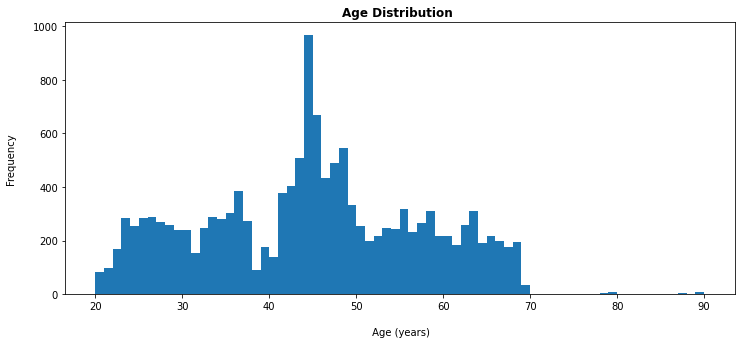

In [86]:
# age distribution graph
bins = np.arange(df_kmpg.age.min(), df_kmpg.age.max()+1, 1)
plt.figure(figsize=(12, 5));
plt.hist(data=df_kmpg, x='age', bins=bins);
plt.xlabel('\n Age (years)');
plt.ylabel('Frequency \n')
plt.title('Age Distribution ', fontweight='bold');

*It appears a majority of the customers have ages between **40** to **50**. Customers with ages of about **45** seem to be the more dominant in terms of numbers.*

### *What is the distribution of  related bike purchases in the last 3 years*

In [86]:
df_kmpg[['past_3_years_bike_related_purchases']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14046 entries, 0 to 14045
Data columns (total 1 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   past_3_years_bike_related_purchases  14046 non-null  int64
dtypes: int64(1)
memory usage: 219.5 KB


In [88]:
df_kmpg.past_3_years_bike_related_purchases.nunique()

100

*It appears of the **14045** different number of bike purchases, there are 100 unique ones, let's then have a look at the distribution of these purchases*

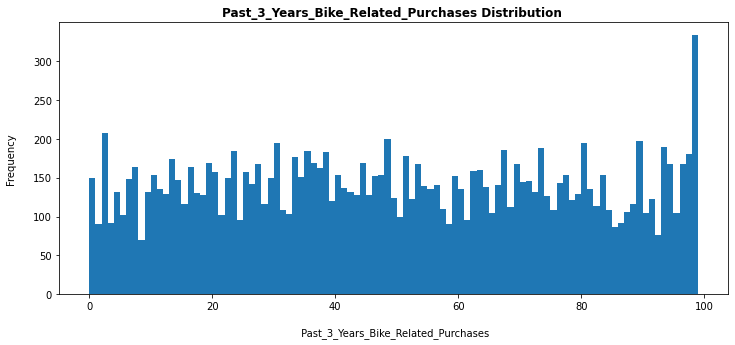

In [88]:
# past_3_years_bike_related_purchases distribution graph
bins = np.arange(df_kmpg['past_3_years_bike_related_purchases'].min(), df_kmpg['past_3_years_bike_related_purchases'].max()+1, 1)
plt.figure(figsize=(12, 5));
plt.hist(data=df_kmpg, x='past_3_years_bike_related_purchases', bins=bins);
plt.xlabel('\n Past_3_Years_Bike_Related_Purchases')
# plt.xlim(0,20)
# plt.ylim(0, 50)
plt.ylabel('Frequency \n')
plt.title('Past_3_Years_Bike_Related_Purchases Distribution ', fontweight='bold');

In [89]:
len(df_kmpg['past_3_years_bike_related_purchases'][df_kmpg['past_3_years_bike_related_purchases'].between(0, 1)])

239

*The different number of bike related purchases seem to lie within **0** to **99**. The number of persons involved in each number seem to lie with **70** to **170** value. Large number of customers seem to have had about **2** and around **97** to **99** related number of purchases in the past 3 years with high peaks recorded at some other related number of bike purchases as well*

## *How is the distribution of profits made for each purchase?*

In [90]:
df_kmpg.profit.describe()

count    14046.000000
mean       551.358304
std        493.266464
min          4.800000
25%        135.850000
50%        445.210000
75%        827.160000
max       1702.550000
Name: profit, dtype: float64

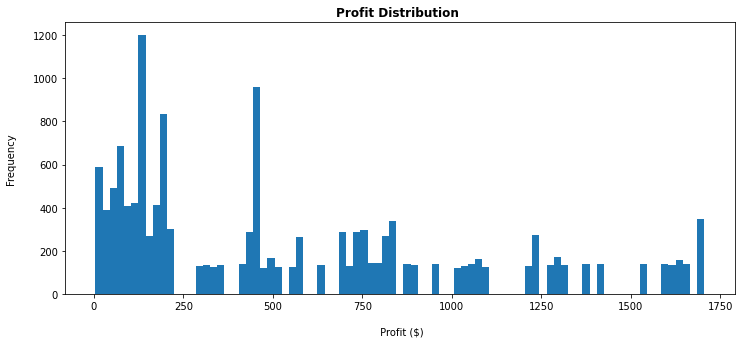

In [91]:
# profit distribution graph
bins = np.arange(df_kmpg.profit.min(), df_kmpg.profit.max()+20, 20)
plt.figure(figsize=(12, 5));
plt.hist(data=df_kmpg, x='profit', bins=bins);
plt.xlabel('\n Profit ($)');
plt.ylabel('Frequency \n')
plt.title('Profit Distribution ', fontweight='bold');

### *Product Line Distribution*

In [216]:
df_kmpg.product_line.value_counts().sort_values()

Mountain      296
Touring       834
Road         2838
Standard    10078
Name: product_line, dtype: int64

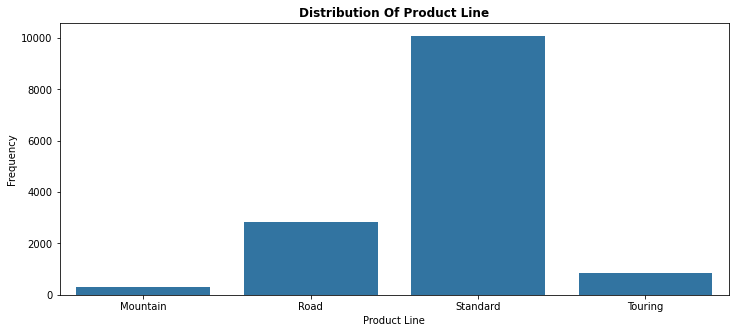

In [215]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='product_line', color = color)
plt.xlabel('Product Line')
plt.ylabel('Frequency')
plt.title('Distribution Of Product Line' ,fontweight='bold');

### *Product Class Distribution*

In [217]:
df_kmpg.product_class.value_counts().sort_values()

low       2092
high      2181
medium    9773
Name: product_class, dtype: int64

Text(0.5, 1.0, 'Distribution Of Product Class')

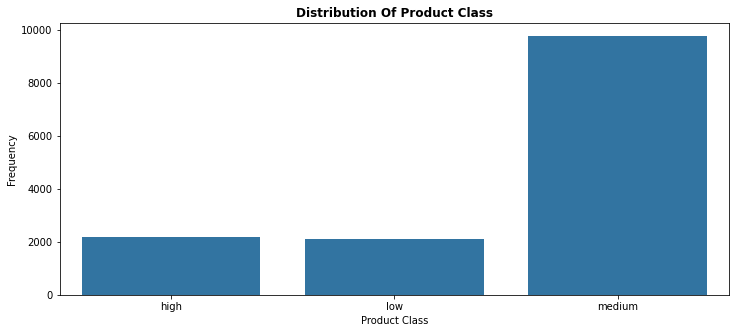

In [218]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='product_class', color = color)
plt.xlabel('Product Class')
plt.ylabel('Frequency')
plt.title('Distribution Of Product Class' ,fontweight='bold');

### *Product size Distribution*

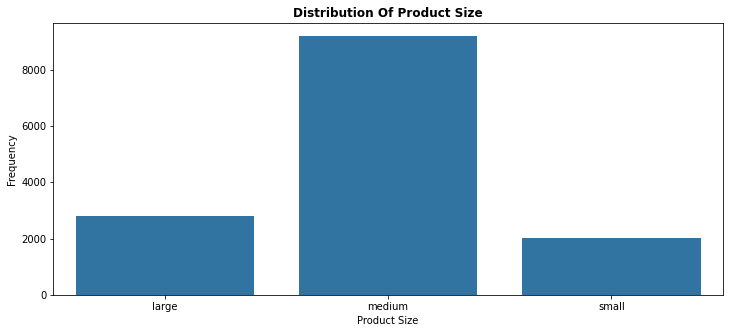

In [219]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='product_size', color = color)
plt.xlabel('Product Size')
plt.ylabel('Frequency')
plt.title('Distribution Of Product Size' ,fontweight='bold');

### *Which age_group  are more dominant?*

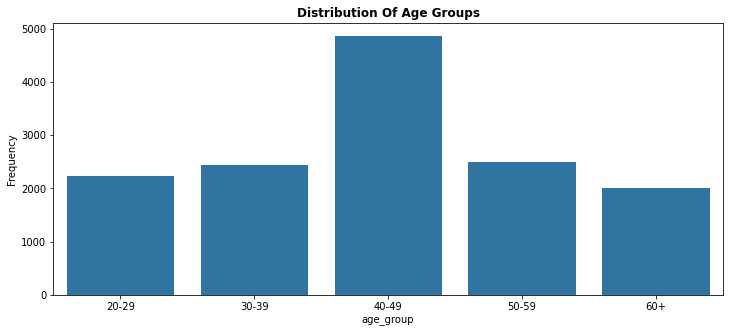

In [92]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='age_group', color = color)
# plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Distribution Of Age Groups' ,fontweight= 'bold');

*More of sprockets customer's clearly seem to have their ages ranging in the **40's**.*

### *What is the distribution of profit by age_group?*

In [93]:
df_kmpg.groupby('age_group').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
20-29,2241.0,545.427443,492.263538,4.8,133.78,437.46,817.36,1702.55
30-39,2432.0,556.420160,497.955478,4.8,135.85,445.21,834.94,1702.55
40-49,4867.0,551.949242,490.980304,4.8,133.78,445.21,827.16,1702.55
50-59,2505.0,561.889325,497.445722,4.8,139.23,445.21,834.94,1702.55
60+,2001.0,537.227531,489.016003,4.8,133.78,445.21,817.36,1702.55


*The discriptive stats is expected to be similar in terms of the range and mean values from the various age groups by profit*

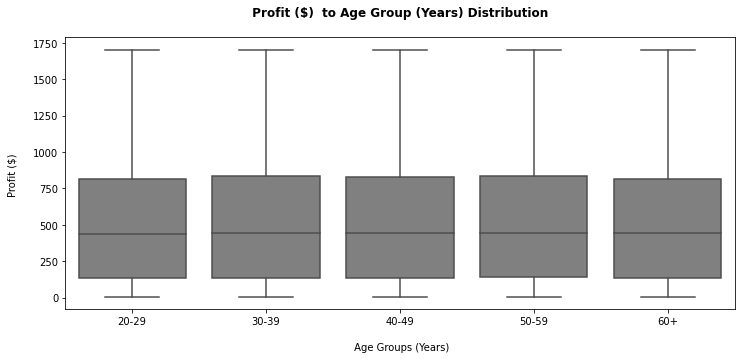

In [94]:
plt.figure(figsize = [12, 5])

# using the dataset without Other and Professional Occupations
sb.boxplot(data=df_kmpg, x='age_group', y='profit', 
           color = 'grey')
# plt.xticks(rotation = 90)
plt.xlabel('\n Age Groups (Years)')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to Age Group (Years) Distribution \n', fontweight='bold');

*The boxplot indicates the range for profit for the individual age groups is looks the same with a mean profit of about **\$450** as well as maximum and minimum values of about **\$1700** and **\$0** respectively.*

### *Total Profit to age_group*

In [172]:
df_kmpg.groupby('age_group').sum()['profit'].sort_values()

age_group
60+      1074992.29
20-29    1222302.90
30-39    1353213.83
50-59    1407532.76
40-49    2686336.96
Name: profit, dtype: float64

*Customers in the **40's** seem to have accumulated more profits compared to the other age groups*

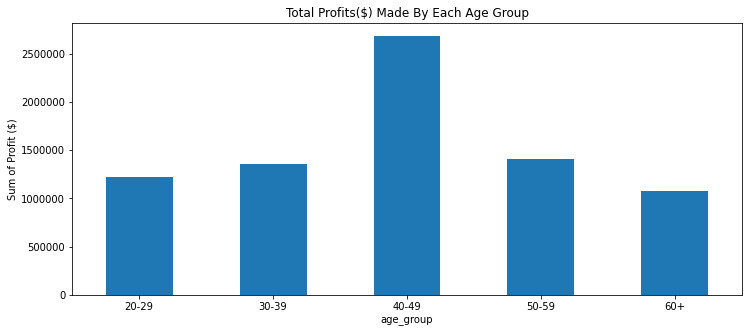

In [184]:
# Define plot space
fig, ax1 = plt.subplots(figsize=(12, 5))

data = df_kmpg.groupby('age_group')['profit'].sum() #Group sum of Sales at Gender level

ax1.set_xlabel('Age Group')  #X-axis label
ax1.set_ylabel('Sum of Profit (\$)') #Y-axis label
ax1.set_title("Total Profits(\$) Made By Each Age Group")#Chart title
ax1.ticklabel_format(useOffset=False, style='plain') # prevents exponential numbering

data.plot(kind='bar', rot=0);


*Again Customers in their **40's** seem to have a much dorminant profit marging compared to the other age groups from the diagram above.*

### *Product line with total Profit*

In [221]:
df_kmpg.groupby('product_line')['profit'].sum().sort_values()

product_line
Mountain      28377.36
Touring      911645.49
Road        1015016.08
Standard    5789339.81
Name: profit, dtype: float64

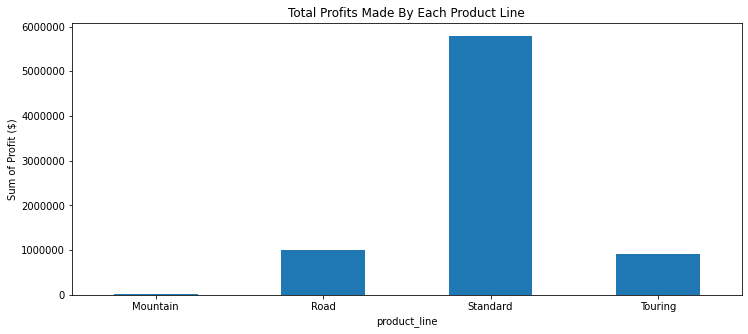

In [225]:
# Define plot space
fig, ax1 = plt.subplots(figsize=(12, 5))

data = df_kmpg.groupby('product_line')['profit'].sum() #Group sum of Sales at Gender level

ax1.set_xlabel('Product Line') #X-axis label
ax1.set_ylabel('Sum of Profit (\$)') #Y-axis label
ax1.set_title("Total Profits Made By Each Product Line") #Chart title
ax1.ticklabel_format(useOffset=False, style='plain') # prevents exponential numbering

data.plot(kind='bar', rot=0);

In [229]:
# # Logarithmic plotting for Occupational Distribution
# plt.figure(figsize=(12, 5))
# sb.countplot(data = df_kmpg, x = 'product_line', color='grey')
# plt.yscale('log')
# plt.yticks([1e3, 1e4, 1e5], ['1k', '10k', '100k'])
# plt.xlabel('Product Line', fontweight='bold')
# plt.ylabel('Count  (Log Scale)', fontweight='bold')
# plt.title('Product Line Distribution of Customers \n', fontweight='bold');

### *What is the distribution of profit by brand?*

In [95]:
df_kmpg.groupby('brand').sum()['profit'].sort_values(ascending=False)

brand
WeareA2B          1914822.27
Solex             1720352.29
Trek Bicycles     1342182.39
Giant Bicycles    1104885.96
OHM Cycles        1043651.96
Norco Bicycles     618483.87
Name: profit, dtype: float64

In [96]:
df_kmpg.groupby('brand').describe()['profit'].sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Solex,3042.0,565.533297,468.849529,17.87,179.44,437.46,751.02,1612.25
Giant Bicycles,2343.0,471.568912,345.537667,41.13,198.22,448.68,641.64,1230.27
WeareA2B,2291.0,835.801951,536.330668,15.08,155.65,834.94,1230.30,1660.88
OHM Cycles,2162.0,482.725236,499.817584,4.80,91.15,199.10,771.12,1592.19
Trek Bicycles,2133.0,629.246315,604.535816,75.48,133.38,198.29,903.11,1702.55
Norco Bicycles,2075.0,298.064516,254.498916,64.51,90.10,182.81,445.21,830.24


*The table indicates the the price of the Trek Bicycles are relatively higher compared to the others looking at the min and max values for all brands.The count, mean and std also gives us an indication that the more profit was likely to be generated from the **WeareA2B** brand*

*The **solex brand** seems to have the highest count*

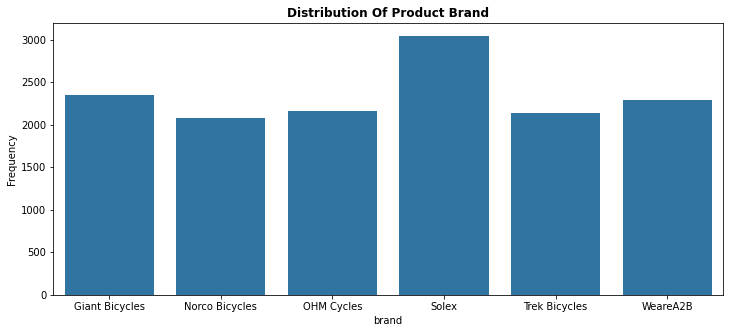

In [125]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='brand', color = color)
plt.ylabel('Frequency')
plt.title('Distribution Of Product Brand' ,fontweight= 'bold');

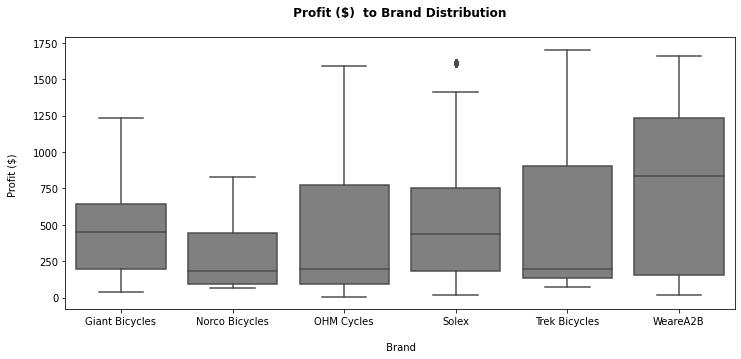

In [98]:
plt.figure(figsize = [12, 5])

# using the dataset without Other and Professional Occupations
sb.boxplot(data=df_kmpg, x='brand', y='profit', 
           color = 'grey')
# plt.xticks(rotation = 90)
plt.xlabel('\n Brand')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to Brand Distribution \n', fontweight='bold');

*The **Norco** brand seems to have made the least in terms of profits made on the various brands with the **WeareA2B** being the highest*

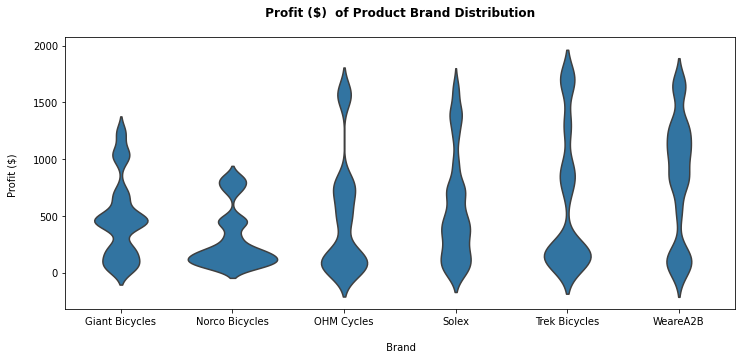

In [183]:
# Violin plot of profit distribution by brand
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

sb.violinplot(data=df_kmpg, x='brand', y='profit', inner = None,
              color = base_color)
plt.xlabel('\n Brand')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  of Product Brand Distribution \n', fontweight='bold');

### *What is the total profit generated from each product brand*

In [175]:
df_kmpg.groupby('brand').sum()['profit'].sort_values(ascending=False)

brand
WeareA2B          1914822.27
Solex             1720352.29
Trek Bicycles     1342182.39
Giant Bicycles    1104885.96
OHM Cycles        1043651.96
Norco Bicycles     618483.87
Name: profit, dtype: float64

*The data indicates **WeareA2B** brand generates more profit in total compared to the others. In as much as the **solex** and the **Giant** Brands had more customers, the **WeareA2B** brand still generated much revenue which*

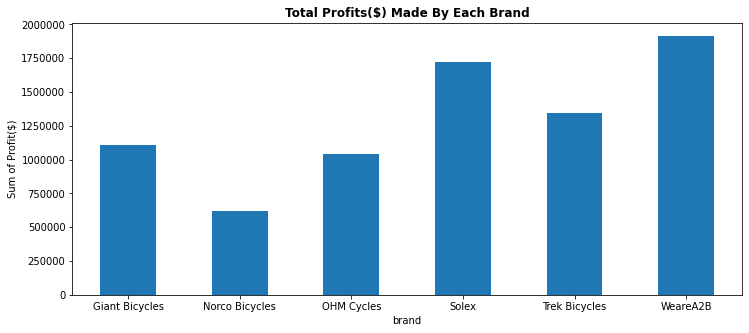

In [178]:
# Define plot space
fig, ax1 = plt.subplots(figsize=(12, 5))

data = df_kmpg.groupby('brand')['profit'].sum() #Group sum of Sales at Gender level

ax1.set_xlabel('Brand')  # X-axis label
ax1.set_ylabel('Sum of Profit(\$)') #Y-axis label
ax1.set_title("Total Profits(\$) Made By Each Brand", fontweight="bold") # Chart title
ax1.ticklabel_format(useOffset=False, style='plain') # prevents exponential numbering

data.plot.bar(rot=0);

*Again, the **WeareA2B** brand accumulates more profit.*

### *How does car owernship compares in terms of profit?*

In [100]:
df_kmpg.groupby('owns_car').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
owns_car,,,,,,,,
No,6943.0,542.970449,484.860283,4.8,133.78,437.46,827.16,1702.55
Yes,7103.0,559.557217,501.245571,4.8,135.85,448.68,834.94,1702.55


*There seems to be not much of a difference in terms of profit comparing those that did own cars to those that did not*

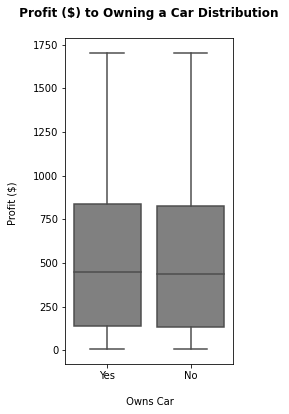

In [101]:
plt.figure(figsize = [3, 6])

# using the dataset without Other and Professional Occupations
sb.boxplot(data=df_kmpg, x='owns_car', y='profit', 
           color = 'grey')
# plt.xticks(rotation = 90)
plt.xlabel('\n Owns Car')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($) to Owning a Car Distribution \n', fontweight='bold');

*Car owners from the diagram seem no to have so much of an influence on the profit generated from the customer. The mean value of those who owned cars however seem to be slighly above those that did not own a car which most like could be due to the number of persons involved in there*

### *Compairing total profit to owning a car?*

In [159]:
df_kmpg.groupby('owns_car').sum()['profit']

owns_car
No     3769843.83
Yes    3974534.91
Name: profit, dtype: float64

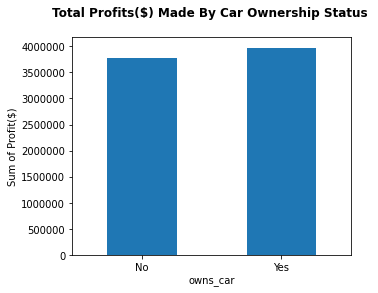

In [168]:
# Define plot space
fig, ax1 = plt.subplots(figsize=(5, 4))
data = df_kmpg.groupby('owns_car')['profit'].sum() #Group sum of Sales at Gender level

ax1.set_xlabel('Car Owner')  #X-axis label
ax1.set_ylabel('Sum of Profit(\$)') #Y-axis label
ax1.set_title("Total Profits(\$) Made By Car Ownership Status \n", fontweight="bold") # Chart title
ax1.ticklabel_format(useOffset=False, style='plain') # prevents exponential numbering

data.plot.bar(rot=0);

*Person's who own Cars seem to have a higher cumulative profits in total compared to those that do not own cars*

### *How does the past 3 years of bike related puchases compares to age?*

In [102]:
df_kmpg[['age', 'past_3_years_bike_related_purchases']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,14046.0,44.373131,12.577035,20.0,35.0,44.0,54.0,90.0
past_3_years_bike_related_purchases,14046.0,49.424747,28.680755,0.0,25.0,48.0,74.0,99.0


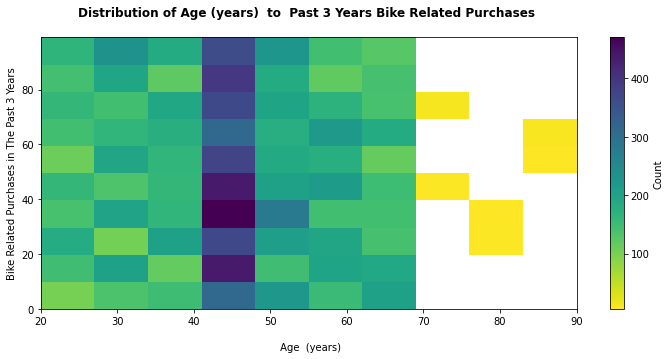

In [103]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 

plt.figure(figsize = (12,5))
h2d = plt.hist2d(data = df_kmpg, x = 'age', y = 'past_3_years_bike_related_purchases', 
                 cmin=1, cmap='viridis_r')
plt.colorbar(label='Count')
plt.xlabel('\n Age  (years)')
plt.ylabel('Bike Related Purchases in The Past 3 Years')
plt.title("Distribution of Age (years)  to  Past 3 Years Bike Related Purchases \n", fontweight ='bold');


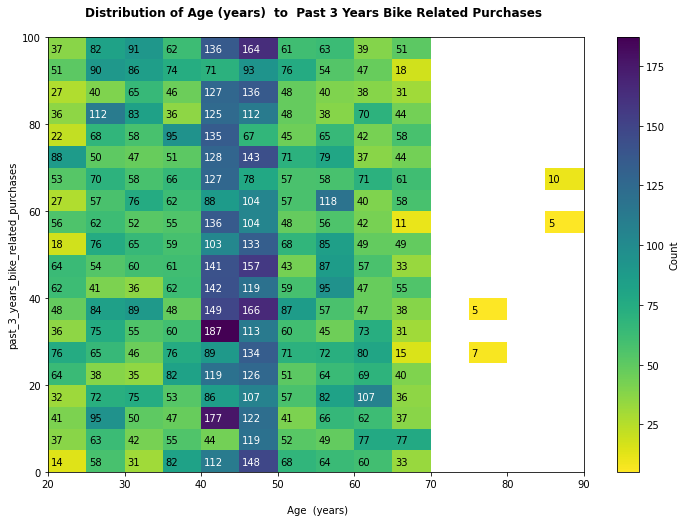

In [104]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 

bins_x = np.arange(df_kmpg.age.min(), df_kmpg.age.max()+5, 5)
bins_y = np.arange(df_kmpg.past_3_years_bike_related_purchases.min(), df_kmpg.past_3_years_bike_related_purchases.max()+5, 5)

plt.figure(figsize = (12,8))
h2d = plt.hist2d(data = df_kmpg, x = 'age', y = 'past_3_years_bike_related_purchases', 
                 cmin=1, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar(label='Count')
plt.xlabel('\n Age  (years)')
plt.ylabel('past_3_years_bike_related_purchases')
plt.title("Distribution of Age (years)  to  Past 3 Years Bike Related Purchases \n", fontweight ='bold');

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'left', va = 'top', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'left', va = 'top', color = 'black')

*There seems to be a large number of people in their **40's** with purchases related to bikes in the past 3 years which in a way does not seem to be so surprising as there happens to be a large number of people in this group. It should be noted there is large population of person's with about **30** to **40** bike related purchses who are in their **40's** in the past 3 years. Also, people with age from about **69 and above** seem to have higher number of bike related purchases although their number seem be quite smaller. This may generally be due to the low number of people within that age group in general. People within this age group also seem to have at least **20** number purchases related to bikes in the past 3 years*

### *How does the past 3 years of bike related puchases compares to age?*

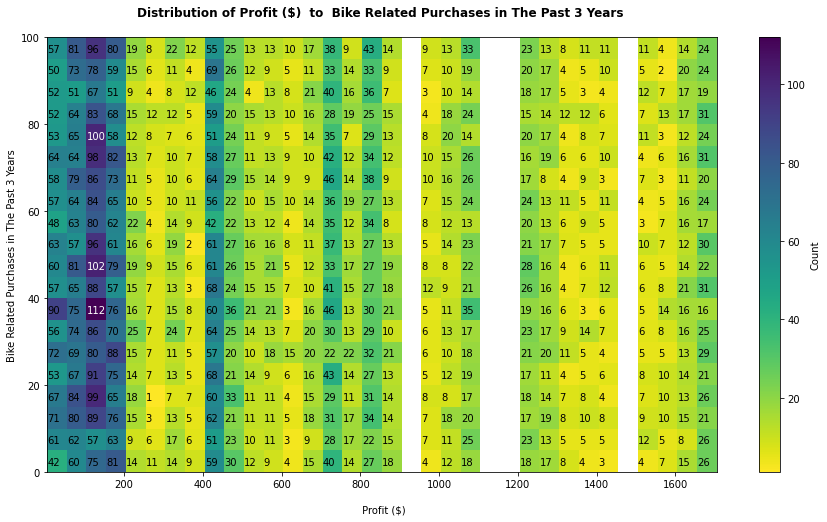

In [105]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 

bins_x = np.arange(df_kmpg.profit.min(), df_kmpg.profit.max()+50, 50)
bins_y = np.arange(df_kmpg.past_3_years_bike_related_purchases.min(), df_kmpg.past_3_years_bike_related_purchases.max()+5, 5)

plt.figure(figsize = (15,8))
h2d = plt.hist2d(data = df_kmpg, x = 'profit', y = 'past_3_years_bike_related_purchases', 
                 cmin=1, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar(label='Count')
plt.xlabel('\n Profit (\$)')
plt.ylabel('Bike Related Purchases in The Past 3 Years')
plt.title("Distribution of Profit (\$)  to  Bike Related Purchases in The Past 3 Years \n", fontweight ='bold');

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'left', va = 'top', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'left', va = 'top', color = 'black')


*The profit from each purchase does not seem to be dependant on the records regarding the past 3 years bike related purchases. Most of profits made seem to clusted within the **\$200** mark range with large counts usally associated within the **\$100** to **\$150**. A much precise information is revealed in counts above 100 within past bike purchasing records at **35-40**, **45-50**, and **75-80**. Profits around **\$400** to **\$450** also seemed to have been made with a fairly large number of people*

### *Distribution of Gender with profit*

In [106]:
df_kmpg.groupby('gender').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,7127.0,545.591605,491.567329,4.8,133.78,445.21,827.16,1702.55
Male,6919.0,557.298362,494.975862,4.8,135.85,445.21,830.24,1702.55


*There doesn't seem to be much of a difference in terms of profit distribution with gender with a slight difference in terms of the mean values favouring the male*

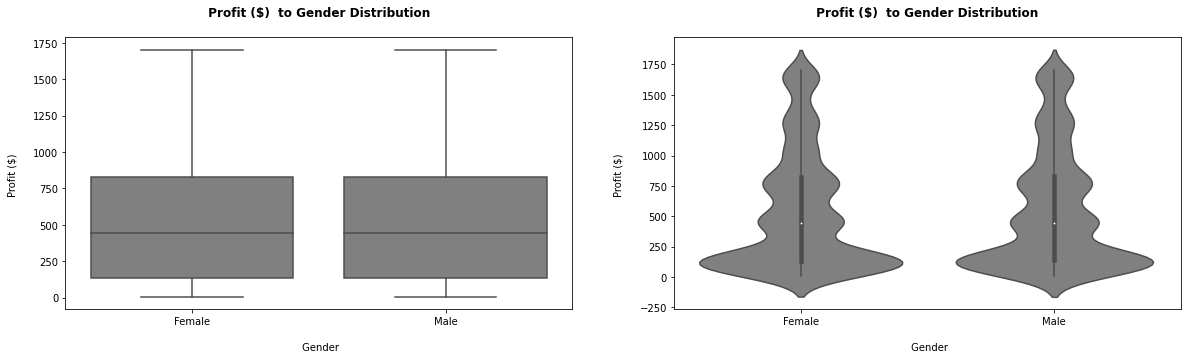

In [107]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
sb.boxplot(data=df_kmpg, x='gender', y='profit', 
           color = 'grey')
plt.xlabel('\n Gender')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to Gender Distribution \n', fontweight='bold');

# center plot: box plot
plt.subplot(1, 2, 2)
sb.violinplot(data=df_kmpg, x='gender', y='profit', 
           color = 'grey')
# plt.xticks(rotation = 90)
plt.xlabel('\n Gender')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to Gender Distribution \n', fontweight='bold');

*In both plots, the profit distribution seems almost the same in all instances with large number of persons giving out lower profits and the number of persons gradually reducing as the profits gets larger*

### *Distribution of job_title*

In [108]:
len(df_kmpg.job_title.value_counts().sort_values())

195

In [109]:
df_kmpg.groupby('job_title').describe()['profit'].sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Database Administrator II,5.0,532.550000,550.776687,15.08,75.1400,547.280,641.6400,1383.61
Developer I,7.0,619.625714,605.086036,133.78,182.7500,327.980,939.9350,1630.25
Office Assistant II,8.0,532.632500,560.503885,15.08,118.0150,323.055,861.9350,1612.25
Research Assistant III,8.0,497.577500,518.227373,17.87,118.1200,254.050,878.7100,1408.91
Automation Specialist IV,10.0,438.187000,611.848287,14.23,51.7625,109.555,651.2500,1630.25
Geologist II,11.0,423.658182,326.607176,25.09,119.6350,409.860,608.1300,1028.76
Human Resources Assistant IV,11.0,497.167273,411.401702,4.80,109.6500,690.490,800.6800,1028.76
Programmer Analyst I,12.0,426.609167,505.233652,25.09,133.6800,179.440,460.1550,1592.19
Accounting Assistant IV,13.0,605.331538,509.897978,45.96,167.2100,547.280,1069.5500,1612.25


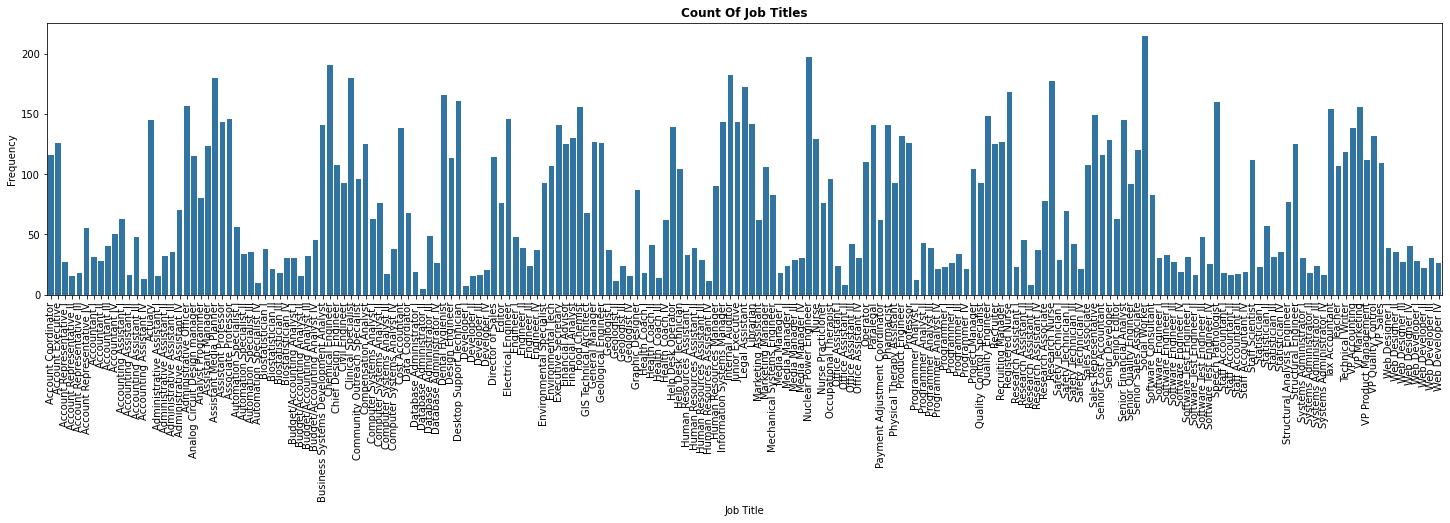

In [110]:
plt.figure(figsize =(25, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='job_title', color = color)
plt.xticks(rotation = 90)
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Count Of Job Titles' ,fontweight= 'bold');

*Large difference in terms of numbers from the various job titles*

### *Job Title and Profit distribution*

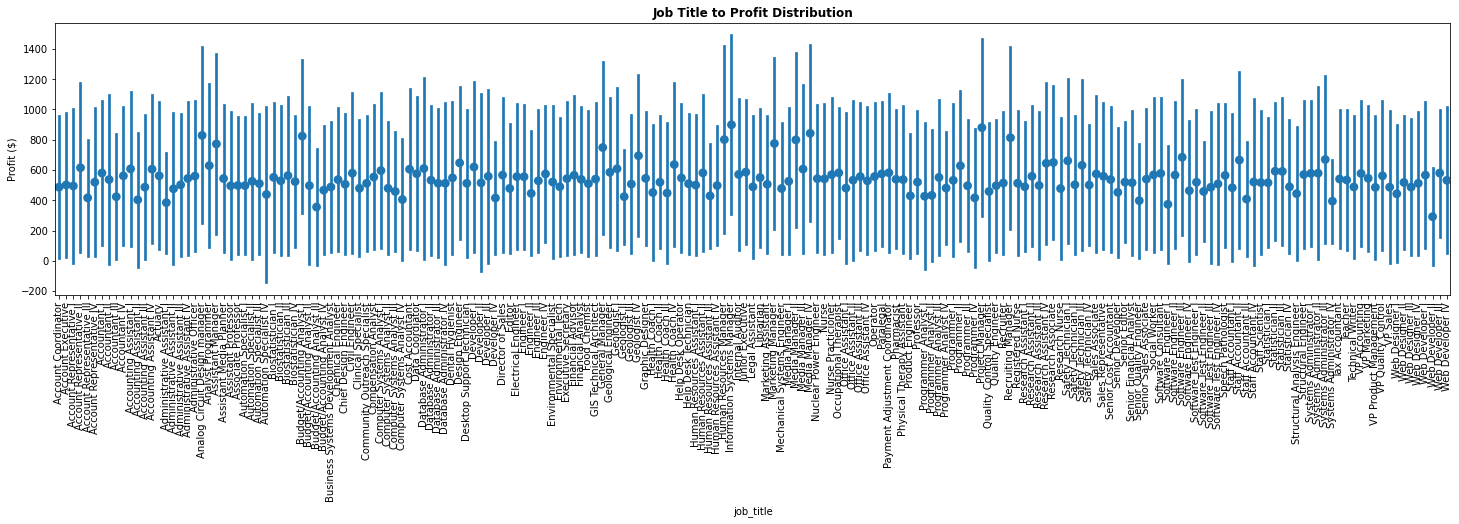

In [183]:
# job title and profit
plt.figure(figsize=(25,5))
sb.pointplot(data=df_kmpg, x='job_title', y='profit', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=90)
plt.ylabel('Profit (\$)')
plt.title('Job Title to Profit Distribution', fontweight='bold');

*The mean profit of the different job titles seem to fall within the **\$450** to **\$750** region. Most of the profits generated in terms of job titles are somehow largely dispersed with each job title*

### *Distribution  and Relation of Job Industry Category*

In [111]:
df_kmpg.groupby('job_industry_category').describe()['profit'].sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
job_industry_category,,,,,,,,
Telecommunications,312.0,536.804647,493.590052,4.8,135.85,434.395,804.805,1702.55
Argiculture,485.0,528.635897,472.769340,4.8,139.23,437.460,802.260,1702.55
IT,584.0,546.071267,509.293113,4.8,133.38,431.330,819.810,1702.55
Entertainment,625.0,552.413904,482.903014,4.8,139.23,445.210,834.940,1702.55
Property,1091.0,548.050229,485.232257,4.8,137.54,445.210,817.360,1702.55
Retail,1451.0,564.247326,498.315429,4.8,137.54,448.680,872.890,1702.55
Health,2725.0,540.384437,494.145516,4.8,133.38,431.330,827.160,1702.55
Financial Services,3341.0,568.391446,501.922556,4.8,135.85,448.680,834.940,1702.55
Manufacturing,3432.0,544.333884,486.272807,4.8,133.78,445.210,817.360,1702.55


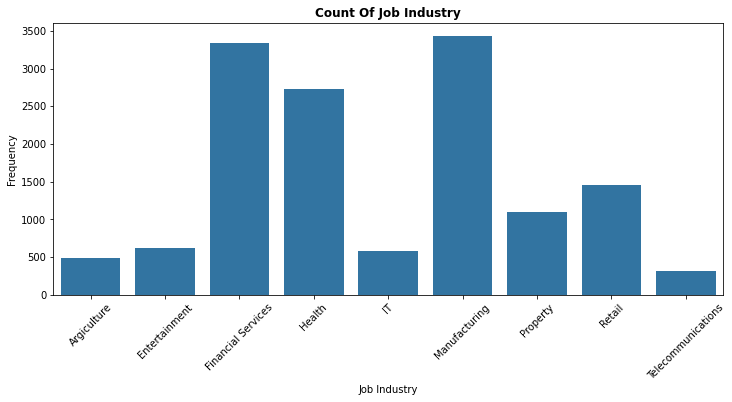

In [112]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='job_industry_category', color = color)
plt.xticks(rotation = 45)
plt.xlabel('Job Industry')
plt.ylabel('Frequency')
plt.title('Count Of Job Industry' ,fontweight= 'bold');

### *Distribution of Job industry Category by profit*

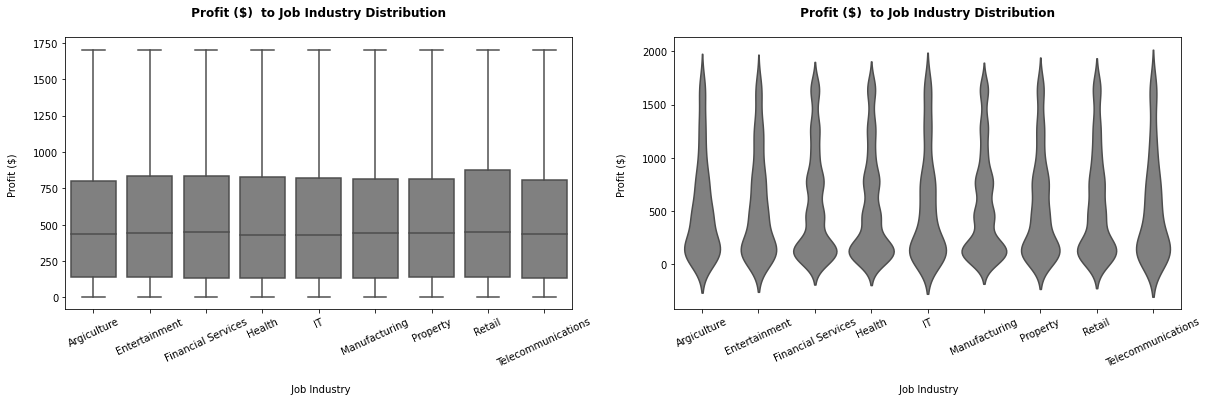

In [113]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
sb.boxplot(data=df_kmpg, x='job_industry_category', y='profit', 
           color = 'grey')
plt.xticks(rotation = 25)
plt.xlabel('\n Job Industry')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to Job Industry Distribution \n', fontweight='bold');

# Right plot: box plot
plt.subplot(1, 2, 2)
sb.violinplot(data=df_kmpg, x='job_industry_category', y='profit', 
           inner = None, color = 'grey')
plt.xticks(rotation = 25)
plt.xlabel('\n Job Industry')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to Job Industry Distribution \n', fontweight='bold');

*Just like in the other plots, the profits seems to be cummulated i n the **\$200** range indicating most profit obtained from the various job industries fall within this value*

### *Total Profit Made from Each Job Category*

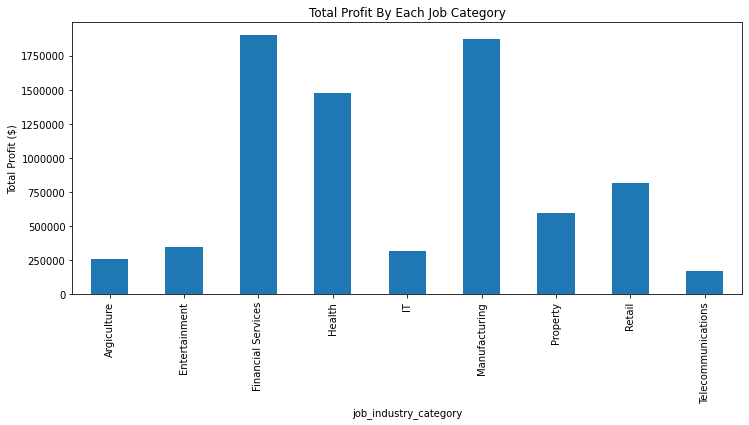

In [158]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 5))

var = df_kmpg.groupby('job_industry_category')['profit'].sum() #Group sum of Sales at Gender level

# Set plot title and axes labels
ax.set(title = "Total Profit By Each Job Category",
       xlabel = "Job Industry",
       ylabel = "Total Profit (\$)")
ax.ticklabel_format(useOffset=False, style='plain') # prevents exponential numbering
var.plot(kind='bar');

*It appears the job categories with high counts by defaults recorded higher profits as well which is plausible. Customers from the **financial Services**, **Manufacturing** and **Health** industries seem to generate more income for the organization.*

### *State distribution by profit*

In [114]:
df_kmpg.state.value_counts()

NSW    7430
VIC    3506
QLD    3110
Name: state, dtype: int64

In [121]:
df_kmpg[['profit', 'state']].groupby(['state']).describe()

profit                                                              
        count        mean         std  min     25%     50%     75%      max
state                                                                      
NSW    7430.0  548.874501  494.881456  4.8  133.78  437.46  827.16  1702.55
QLD    3110.0  551.874891  491.669627  4.8  135.85  445.21  827.16  1702.55
VIC    3506.0  556.163802  491.352050  4.8  135.85  448.68  827.16  1702.55

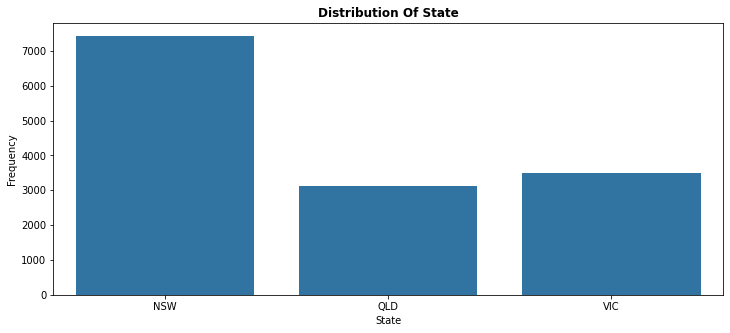

In [122]:
plt.figure(figsize =(12, 5))
color = sb.color_palette()[0]
sb.countplot(data=df_kmpg, x ='state', color = color)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Distribution Of State' ,fontweight= 'bold');

*NSW clearly has more numbers compared to the other states*

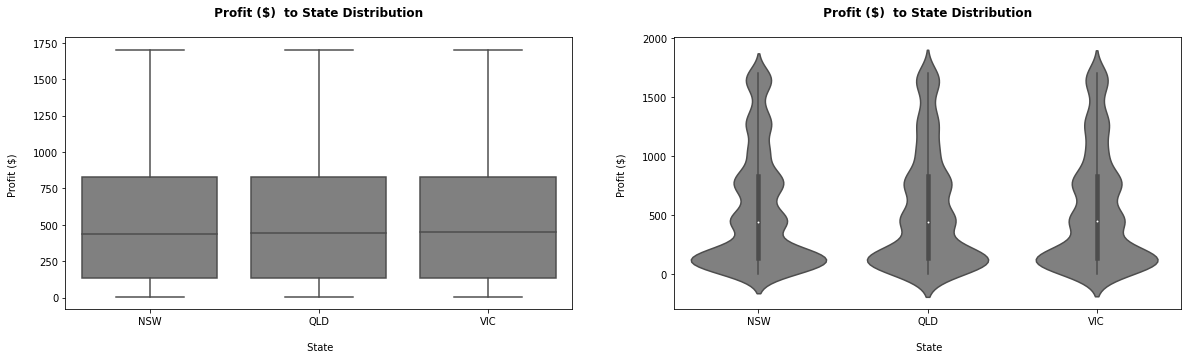

In [123]:
# State to profit distribution plot
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
sb.boxplot(data=df_kmpg, x='state', y='profit', 
           color = 'grey')
plt.xlabel('\n State')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to State Distribution \n', fontweight='bold');

# center plot: box plot
plt.subplot(1, 2, 2)
sb.violinplot(data=df_kmpg, x='state', y='profit', 
           color = 'grey')
# plt.xticks(rotation = 90)
plt.xlabel('\n State')
plt.ylabel('Profit (\$) \n')
plt.title(' Profit ($)  to State Distribution \n', fontweight='bold');

In [126]:
df_kmpg.groupby('state').sum()['profit']

state
NSW    4078137.54
QLD    1716330.91
VIC    1949910.29
Name: profit, dtype: float64

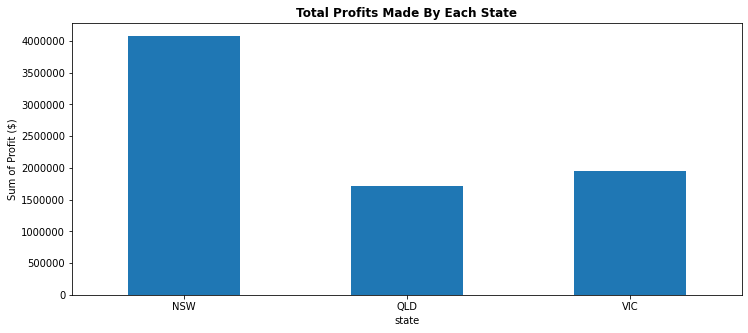

In [180]:
# Define plot space
fig, ax1 = plt.subplots(figsize=(12, 5))

# # Define x and y axes
# ax.plot(months, 
#         boulder_monthly_precip)

var = df_kmpg.groupby('state')['profit'].sum() #Group sum of Sales at Gender level

ax1.set_xlabel('State')  #X-axis label
ax1.set_ylabel('Sum of Profit (\$)') #Y-axis label
ax1.set_title("Total Profits Made By Each State", fontweight="bold")#Chart title
ax1.ticklabel_format(useOffset=False, style='plain') # prevents exponential numbering
var.plot(kind='bar', rot=0);

*The total profit for displays customers from **NSW** contributed to for most profit*

## *Multivariate Exploration*<a id='mexpl'></a>

### *How the numeric variables correlate*

In [184]:
df_kmpg.describe()

,past_3_years_bike_related_purchases,age,list_price,standard_cost,profit,property_valuation,tenure
count,14046.000000,14046.000000,14046.000000,14046.000000,14046.000000,14046.000000,14046.000000
mean,49.424747,44.373131,1110.428801,559.070497,551.358304,7.472092,10.707604
std,28.680755,12.577035,583.993574,409.064324,493.266464,2.842696,5.672968
min,0.000000,20.000000,12.010000,7.210000,4.800000,1.000000,1.000000
25%,25.000000,35.000000,575.270000,215.140000,135.850000,6.000000,6.000000
50%,48.000000,44.000000,1163.890000,507.580000,445.210000,8.000000,11.000000
75%,74.000000,54.000000,1635.300000,795.100000,827.160000,10.000000,16.000000
max,99.000000,90.000000,2091.470000,1759.850000,1702.550000,12.000000,22.000000


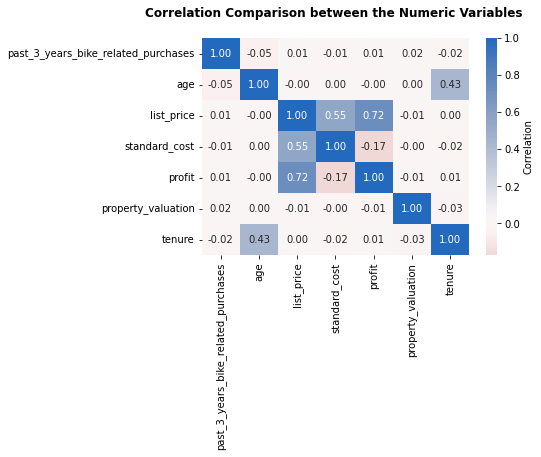

In [186]:
# determining the correlation among some numeric variabels
sb.heatmap(df_kmpg[['past_3_years_bike_related_purchases', 'age', 'list_price', 
                    'standard_cost', 'profit', 'property_valuation', 'tenure']].corr(), 
           annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, cbar_kws = {'label' : 'Correlation'})
plt.title('Correlation Comparison between the Numeric Variables \n', fontweight='bold' );


*Profit seem not to have a good correlation with most of the variables. When considering new customers for eg, it would be somehow complex to determine factors to consider considering most of these data are not available from the new clients*

### *Comparing Brand , Age Group and Profit*

In [201]:
# df_kmpg.groupby(['age_group', 'brand']).sum()['profit']

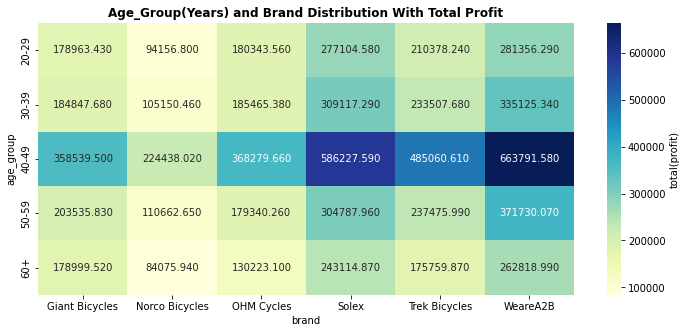

In [202]:
# plt.figure(figsize = (12,5))
# cat_means = df_kmpg.groupby(['brand', 'age_group']).mean()['profit']
# cat_means = cat_means.reset_index(name = 'profit_avg')
# cat_means = cat_means.pivot(index = 'age_group', columns = 'brand',
#                             values = 'profit_avg')
# sb.heatmap(cat_means, annot = True, fmt = '.3f', cmap="YlGnBu",
#            cbar_kws = {'label' : 'mean(profit)'});

plt.figure(figsize = (12,5))
cat_means = df_kmpg.groupby(['brand', 'age_group']).sum()['profit']
cat_means = cat_means.reset_index(name = 'profit_total')
cat_means = cat_means.pivot(index = 'age_group', columns = 'brand',
                            values = 'profit_total')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cmap="YlGnBu",
           cbar_kws = {'label' : 'total(profit)'})
plt.title('Age_Group(Years) and Brand Distribution With Total Profit', fontweight='bold');

*Again within each brand, customer's in their **40's** tend to have the largest profits. **WeareA2B** and **Solex** again show much dorminance in terms of th total profits made*

### *Gender, Job industry Category and Profit*

In [208]:
df_kmpg.groupby(['gender', 'job_industry_category']).sum()['profit']

gender  job_industry_category
Female  Argiculture              152174.14
        Entertainment            152414.79
        Financial Services       933424.32
        Health                   716758.83
        IT                       168271.48
        Manufacturing            955807.67
        Property                 308347.55
        Retail                   422604.68
        Telecommunications        78627.91
Male    Argiculture              104214.27
        Entertainment            192843.90
        Financial Services       965571.50
        Health                   755788.76
        IT                       150634.14
        Manufacturing            912346.22
        Property                 289575.25
        Retail                   396118.19
        Telecommunications        88855.14
Name: profit, dtype: float64

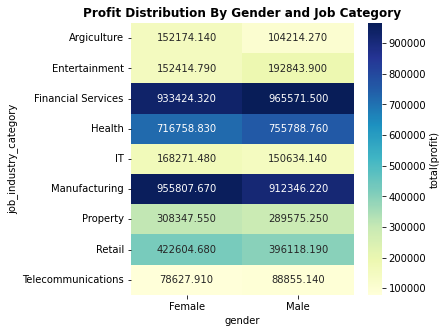

In [187]:
plt.figure(figsize = (5,5))
cat_totals = df_kmpg.groupby(['gender', 'job_industry_category']).sum()['profit']
cat_totals = cat_totals.reset_index(name = 'profit_total')
cat_totals = cat_totals.pivot(index = 'job_industry_category', columns = 'gender',
                            values = 'profit_total')
sb.heatmap(cat_totals, annot = True, fmt = '.3f', cmap="YlGnBu",
           cbar_kws = {'label' : 'total(profit)'});
plt.title('Profit Distribution By Gender and Job Category', fontweight = 'bold');

*It appears profit is closely distributed in terms of gender with regards to the various **job categories** and the dorminant job categories showing higher profits generated for the different gender groups*

### *How does the Past 3 years bike related purchases, and age compares to profit ?*

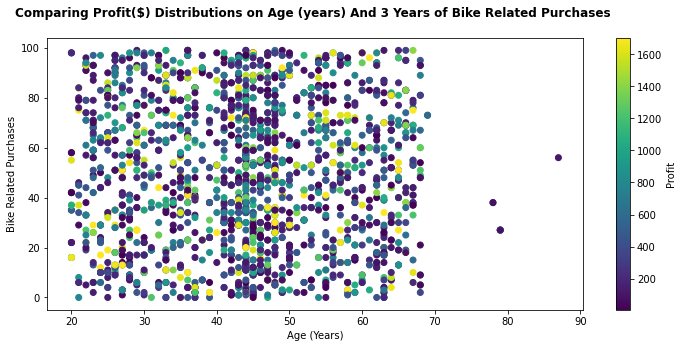

In [230]:
plt.figure(figsize = [12,5])
plt.scatter(data = df_kmpg.sample(2000), x = 'age', y = 'past_3_years_bike_related_purchases',
                c = 'profit')
plt.colorbar(label = 'Profit')
plt.xlabel('Age (Years)')
plt.ylabel('Bike Related Purchases')
plt.title('Comparing Profit(\$) Distributions on Age (years) And 3 Years of Bike Related Purchases \n', fontweight ='bold');

*It appears the profit distributions for these columns does not follow a particular pattern. Those with higher profits however seem to be less. Customers above **70** years seem to have at least about **25** number of bike related purchases with profits mostly at somewhere within the **\$600** to **\$800** region with a fair proportion in the **\$200** range as well*

### *Statistical Tests*<a id='stat'></a>
*We would want to import the statistical modules needed for our analysis*

In [114]:
import researchpy as rp
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import scale

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison


In [88]:
# lets have a look at our dataset once more
df_kmpg.head()

,transaction_id,customer_id,product_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_group,list_price,standard_cost,profit,address,postcode,state,country,property_valuation,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_date,product_first_sold_date,online_order,order_status,brand,product_line,product_class,product_size
0,94,1,86,Laraine,Medendorp,Female,93,1953-10-12,68,60+,235.63,125.07,110.56,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-12-23,1970-01-01 00:00:00.000038482,0,Approved,OHM Cycles,Standard,medium,medium
1,3765,1,38,Laraine,Medendorp,Female,93,1953-10-12,68,60+,1577.53,826.51,751.02,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-04-06,1970-01-01 00:00:00.000039526,1,Approved,Solex,Standard,medium,medium
2,5157,1,47,Laraine,Medendorp,Female,93,1953-10-12,68,60+,1720.70,1531.42,189.28,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-05-11,1970-01-01 00:00:00.000037823,1,Approved,Trek Bicycles,Road,low,small
3,9785,1,72,Laraine,Medendorp,Female,93,1953-10-12,68,60+,360.40,270.30,90.10,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-01-05,1970-01-01 00:00:00.000037873,0,Approved,Norco Bicycles,Standard,medium,medium
4,13424,1,2,Laraine,Medendorp,Female,93,1953-10-12,68,60+,71.49,53.62,17.87,060 Morning Avenue,2016,NSW,Australia,10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2017-02-21,1970-01-01 00:00:00.000038573,0,Approved,Solex,Standard,medium,medium


In [89]:
# extrating data of interest for statistical analysis
df_stats = df_kmpg[['gender', 'state', 'profit', 'age', 'age_group', 
                    'past_3_years_bike_related_purchases',
                    'property_valuation', 
                   'job_industry_category', 'wealth_segment', 
                   'online_order', 'brand', 'product_line',
                   'product_class', 'product_size']]

In [90]:
# verifying changes made
df_stats.head(2)

,gender,state,profit,age,age_group,past_3_years_bike_related_purchases,property_valuation,job_industry_category,wealth_segment,online_order,brand,product_line,product_class,product_size
0,Female,NSW,110.56,68,60+,93,10,Health,Mass Customer,0,OHM Cycles,Standard,medium,medium
1,Female,NSW,751.02,68,60+,93,10,Health,Mass Customer,1,Solex,Standard,medium,medium


In [91]:
# checking data shape
df_stats.shape

(14046, 14)

In [92]:
df_stats.profit.describe()

count    14046.000000
mean       551.358304
std        493.266464
min          4.800000
25%        135.850000
50%        445.210000
75%        827.160000
max       1702.550000
Name: profit, dtype: float64

*We will use the t-test to compare the differences in means between two samples of populations and see whether the differences are actually significant*

### *Is The Profit Generated by SpRocket affected by Purchases Related to Gender?*

### *t-test on male and female profits made* <a id='m_f_t-test'></a>
*The first thing we will use the t-test for is to see whether the average profit made by males and females is different and whether that difference is significant*

In [93]:
# description of profit by gender
df_stats.groupby('gender')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,7127.0,545.591605,491.567329,4.8,133.78,445.21,827.16,1702.55
Male,6919.0,557.298362,494.975862,4.8,135.85,445.21,830.24,1702.55


*The number of unique variables seem to be only two hence, we could use the t-test for our analysis. let's have a look at the means using a boxplot once again*

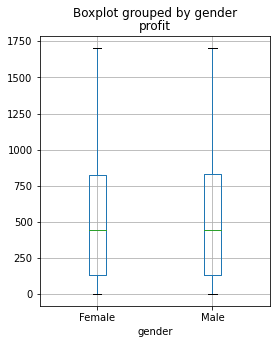

In [94]:
# boxplt for gender
df_stats.boxplot(column='profit', by='gender', figsize=(4,5)); # quick descriptive stats view

*The median looks very similar as seen earlier on*

*In preparation for the **t-test**, we would split the data into two samples*

In [95]:
female_profit = df_stats[df_stats['gender']=='Female']
male_profit = df_stats[df_stats['gender']=='Male']

In [96]:
# verifying change
female_profit.head(2)
male_profit.head(2)

,gender,state,profit,age,age_group,past_3_years_bike_related_purchases,property_valuation,job_industry_category,wealth_segment,online_order,brand,product_line,product_class,product_size
11,Male,NSW,448.68,41,40-49,81,10,Financial Services,Mass Customer,1,Giant Bicycles,Standard,medium,medium
12,Male,NSW,547.28,41,40-49,81,10,Financial Services,Mass Customer,0,WeareA2B,Standard,medium,medium


In [97]:
# checking sample shapes
female_profit.shape, male_profit.shape

((7127, 14), (6919, 14))

*There appears to be more female records than male records. For **t-tests** there is the need the need for an **equal number records in both samples**, hence we would have to ensure that condition is met*

In [98]:
# sampling same sample size for females as there are in males
female_profit = female_profit.sample(6919)

In [99]:
# verifying changes made
female_profit.shape, male_profit.shape

((6919, 14), (6919, 14))

*The data available looks ready for the t-test but before that, we would want to **verify that all other assumptions are satisfied** to proceed with our **t-test**.*
#### *assumptions for t-test*
> * *The variance of the two sample groups are the same*
> * *The distribution of the residuals between the two samples should follow the normal distribution*

##### ***Verifying equal variance assumption***<a id='v_eq_variance'></a>
*We would use the **levene's test** to verify this information. The **null hypothesis** indicates that the variance of the two groups are the same*

In [100]:
# verifying variance equality using levene's test
stats.levene(female_profit['profit'], male_profit['profit'])

LeveneResult(statistic=0.13258745987434706, pvalue=0.7157697777339515)

*Using an alpha level of 0.05, the results from our test indicates our p-value is far above the **0.05** threshold value hence we would accept the **null hypothesis** and thus, **the variances are the same** and not statistically different or significant.*

##### ***Verifying normal residual distribution assumption***<a id='v_fp_mp_residual'></a>
*We would **first calculate the residuance** between the two groups and **scale** it. Scaling standardizes our result which subtracts the mean from every available value and divides by the std so that the resulting samples would have zero means or variance. From here, we can check for distribution using either;*
> * *histogram (not recommended)*
> * *Probability plot also called QQ plot*
> * *Shapiro-Wilk Test for normality (number of data above **5000** may give inaccurate values)*

In [101]:
# calculting difference in the two datasets
# the scale fxn standardizes the result
diff = scale(np.array(female_profit['profit']) - np.array(male_profit['profit'])) 

##### Verifying normal distribution of residual data using histogram

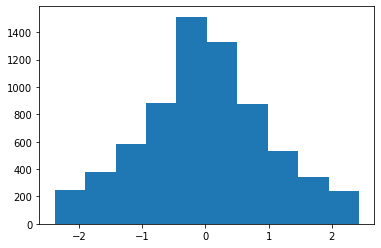

In [121]:
# histogram view of residual
plt.hist(diff);

*The residual data does seem to follow a **normal distribution**. But then this happens to be a very rough check*

##### Verifying normal distribution of residual data using Probability Plot

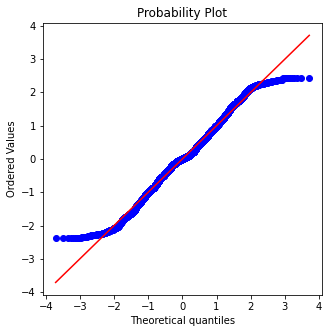

In [124]:
# checking normal distribution using probability plot
plt.figure(figsize=(5,5))
stats.probplot(diff, plot=plt, dist='norm')
plt.show();

*The residual data closely follows the normal distribution from the probplot. Not really a perfect match though since **at std greater that 2 at both ends** away from the mean, the data deviates from the redline which represents the **quantile information** for a normally distributed data. Since majority of the data is normally distributed we would accept that the data is mormally distributed*

##### Verifying normal distribution of residual data using the Shapiro-Wilk Test
*The **null hypothesis** for this test states that the datsets are normally distributed*

In [133]:
# checking normal distribution using shapiro test
print(stats.shapiro(diff))
print(stats.shapiro(diff[:5000])) # shapiro may not be accurate for N > 5000 hence this

ShapiroResult(statistic=0.991595983505249, pvalue=7.613035608283924e-20)
ShapiroResult(statistic=0.9910991191864014, pvalue=3.3680442041497186e-17)


*The test result indicates the redidual data is **not normaly distributed** as a result of the very small p-value hence we **reject the null hypothesis**.*

### *Independent T-test*
*With the **varying results in terms of the opinions of the individual normal distribution tests**, We would still proceed with the independent t-test keeping in mind **we cannot fully rely on our results** in the end*

In [134]:
# performing individual t-test
stats.ttest_ind(female_profit['profit'], male_profit['profit'])

Ttest_indResult(statistic=-1.4283469222479226, pvalue=0.1532146007524647)

*The p-value which is about **15%** indicates that we accept the null hypothesis which indicates there is no difference between the means within these two data samples. As a result, we can statistically conclude that, **whether a male or female purchases a product of sp-rocket, there would be no difference terms of the of profit generated** by the organization*

#### *Using the researchpy Library for further confirmation on t-test analysis*

In [144]:
# performing t-test with researchpy library
descriptives, results = rp.ttest(female_profit['profit'], male_profit['profit'])

In [145]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,profit,6919.0,545.321912,491.367606,5.907243,533.741902,556.901922
1,profit,6919.0,557.298362,494.975862,5.950622,545.633317,568.963408
2,combined,13838.0,551.310137,493.193570,4.192574,543.092124,559.528150


*Where **0**, **1** represents female and male stats respectively*

In [138]:
# printing t-test results
print(results)

                Independent t-test     results
0  Difference (profit - profit) =     -11.9765
1            Degrees of freedom =   13836.0000
2                             t =      -1.4283
3         Two side test p value =       0.1532
4        Difference < 0 p value =       0.0766
5        Difference > 0 p value =       0.9234
6                     Cohen's d =      -0.0243
7                     Hedge's g =      -0.0243
8                 Glass's delta =      -0.0244
9                   Pearson's r =       0.0121


*Again, the p-value is about **15%** which implies we accept the null hypothesis that the mean values are statistically the same. Hence, we say the **profits generated is not impacted by the gender** associated to the customer.*

### *Is The Profit Generated by SpRocket Related To The Past 3 Years Bike Related Purchases?*
*T-test are usually performed on some kind of categorical variables but we would perform this test on the past 3 years bike related purchases which is continous by spliting the data base on the mean value*

*lets have a look at the distribution of the past 3 years bike related purchases*

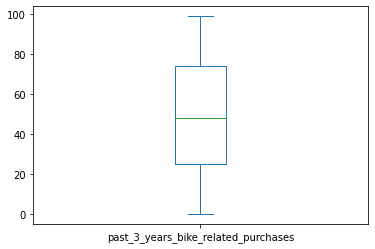

In [159]:
# distribution of bike related purchases in the past 3 years
df_stats.past_3_years_bike_related_purchases.plot.box();

*The mean of the past 3 years bike related purchases seems to lie around the **50th** count region*

*We would want to split this data at the mean level mark*

In [161]:
# splitting the dataset into two based on the mean value
df_stats['above_purchase_mean'] = df_stats['past_3_years_bike_related_purchases'] > df_stats['past_3_years_bike_related_purchases'].mean()

D:\anaconda\envs\my_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [167]:
# verifying changes made
df_stats.above_purchase_mean.value_counts()

False    7177
True     6869
Name: above_purchase_mean, dtype: int64

In [168]:
# brief description about the values of the above purchase mean column
df_stats.groupby('above_purchase_mean')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
above_purchase_mean,,,,,,,,
False,7177.0,544.084652,492.132413,4.8,133.78,437.46,827.16,1702.55
True,6869.0,558.958100,494.370090,4.8,135.85,448.68,830.24,1702.55


*The descriptive stats shows the both purchase types are very similar considering the mean and std. Lets have a better visualization of the data using a box plot*

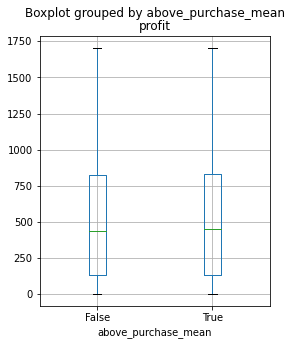

In [172]:
# visualization of descriptive stats
df_stats.boxplot(column='profit', by='above_purchase_mean', figsize=(4, 5));

*Again the visualization depicts clearly the descriptive stats above, looking very similar in terms of distribution but how significant are these similarities? This is what we intend to use our **t-test** for.*

*At this point we would want to split our data into two groups based on the values above and below the mean past 3 years bike related purchases*

In [175]:
# splitting the above mean purchase into two datsets
above_purchase = df_stats[df_stats['above_purchase_mean'] == True]
below_purchase = df_stats[df_stats['above_purchase_mean'] == False]

In [176]:
# verifying data shape
above_purchase.shape, below_purchase.shape

((6869, 14), (7177, 14))

*The different datashapes needs to be made the same for a t-test. We would thus, **sample same number of data** as there are in the above purchase data*

In [177]:
# sampling equal number of data for below data set
below_purchase = below_purchase.sample(6869)

# verifying change
below_purchase.shape

(6869, 14)

In [178]:
# verifying data shape
above_purchase.shape, below_purchase.shape

((6869, 14), (6869, 14))

*At this stage, we would now test the assumptions(**equal variance** and **normal distribution of difference or residual**) for the individual t-tests*

#### *Verifying variance equality using levene's test*
*The null hypothesis for this test states the variances same*

In [179]:
# verifying equality in variance
stats.levene(above_purchase.profit, below_purchase.profit)

LeveneResult(statistic=0.6040876194605087, pvalue=0.4370360354143219)

*Using an alpha level of **0.05**, the p-value indicates the variances of the two samples are not statistically different hence we accept the null hypothesis of equal variance between the two samples*

#### *Verifying normal distribution of residual differences*
*Again we would want to calculate the difference between the two samples then check the distribution of the difference.*

In [181]:
# Calculating the difference between the two samples
diff = scale(np.array(above_purchase.profit) - np.array(below_purchase.profit))

##### *Verifying Normal distribution with histogram*

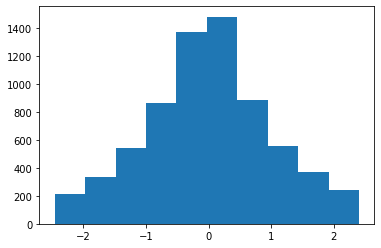

In [183]:
# histogram view of difference
plt.hist(diff);

*The distribution looks almost normal but again this method is not so reliable hence we would employ the **Probability plot**.*

#### *Verifying normal distribution with probability plot*

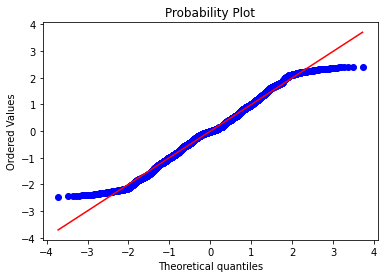

In [186]:
stats.probplot(diff, plot=plt)
plt.show()

*Again, most of the data seem to follow the normal distribution. Once again at about **2.5** std from the mean the distribution deviates from the normal. Since most of the data lies on the red line which is normal distribution line, we would accept the distribution is normal*

#### *Verifying normal distribution using shapiro test*
*The null hypothesis for this test indicates the distribution is normal*

In [188]:
# Performing shapiro test
print(stats.shapiro(diff))
print(stats.shapiro(diff[:5000])) #p-value may not be accurate for N > 5000 hence this

ShapiroResult(statistic=0.9919511675834656, pvalue=2.553388160726025e-19)
ShapiroResult(statistic=0.9921330809593201, pvalue=4.971507947374202e-16)


*Again, we would reject the null hypothesis in this case due to the very small p-value. This does not comply with the result of the previous tests for normal distribution*

#### *Independent t-test*
*Again, the normal distribution tests do not agree with each other but we would again proceed with our test knowing we can't fully accept the results of the t-test*

In [189]:
# performing independent t-test
stats.ttest_ind(above_purchase.profit, below_purchase.profit)

Ttest_indResult(statistic=1.6406049751241654, pvalue=0.10090233778045471)

*The profits generated by the customers whose bike purchase records are above the mean of the total purchases to those whose purchases are below is **not statistically significant**. Hence **the profit generated by Sp-Rocket is not influenced by the past 3 years bike related purchases**. We however, **need to be careful with this result** due to differences in results in terms of the normal distribution for the tests.*

#### *Using researchpy package*
*The researchpy package however enables us perform Welches t-tests on samples with different variances*

In [190]:
# performing t-test with samples on unequal variance
descriptives, results = rp.ttest(above_purchase.profit, above_purchase.profit, equal_variances=False)

In [192]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,profit,6869.0,558.9581,494.370090,5.964931,547.264989,570.651211
1,profit,6869.0,558.9581,494.370090,5.964931,547.264989,570.651211
2,combined,13738.0,558.9581,494.352096,4.217690,550.690852,567.225348


In [193]:
print(results)

                    Welch's t-test  results
0  Difference (profit - profit) =       0.0
1            Degrees of freedom =   13738.0
2                             t =       0.0
3         Two side test p value =       1.0
4        Difference < 0 p value =       0.5
5        Difference > 0 p value =       0.5
6                     Cohen's d =       0.0
7                     Hedge's g =       0.0
8                 Glass's delta =       0.0
9                   Pearson's r =       0.0


*The p-value of about **1.0** indicates whether the number of bike related purchases of a customer for the past 3 years is above or below the mean of the total bike related purchases. The results indicates the past 3-years bike related purchases **has no significant difference** on the profit generated by the organization*

### *OneWay-Anova*

### *Is the Profit Generated Affected by the age group of the Customers?*
*We would use a one-way anova for this statistical test*

In [196]:
# decription of data we intend to analyze
df_stats.groupby('age_group')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
20-29,2241.0,545.427443,492.263538,4.8,133.78,437.46,817.36,1702.55
30-39,2432.0,556.420160,497.955478,4.8,135.85,445.21,834.94,1702.55
40-49,4867.0,551.949242,490.980304,4.8,133.78,445.21,827.16,1702.55
50-59,2505.0,561.889325,497.445722,4.8,139.23,445.21,834.94,1702.55
60+,2001.0,537.227531,489.016003,4.8,133.78,445.21,817.36,1702.55


*The descriptive stats shows the profits generated by the different age groups are very similar considering the mean and standard deviations. But can these similarities not be statistically significant? We would use the one-way anova to determine this factor below*

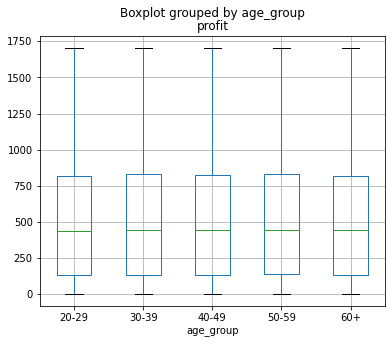

In [200]:
# visual representation of stats
df_stats.boxplot(column='profit', by='age_group', figsize=(6,5));

*Again, the stats are very similar with minimum and max values being the same and mean values falling within the same region*

#### *Using one-way anova on the age group*
*The null hypothesis is that the means for all the samples are the same while at least one would be different for the alternate hypothesis*

In [201]:
stats.f_oneway(df_stats['profit'][df_stats['age_group'] == '20-29'],
              df_stats['profit'][df_stats['age_group'] == '30-39'],
              df_stats['profit'][df_stats['age_group'] == '40-49'],
              df_stats['profit'][df_stats['age_group'] == '50-59'],
              df_stats['profit'][df_stats['age_group'] == '60+'])

F_onewayResult(statistic=0.8427166387706397, pvalue=0.4978086256103098)

*At an alpha level of 0.05, the p-value seems very large and hence we accept the null hypothesis. The products bought by **customers from the different age groups statistically does not affect the profit** generated by the organization*

*How the individual means compare to each other was not made known to us in the test above hence we would perform a Multicomparison test for Tukeys Honest Significant Test to see this differences*

#### *Tukey's Honest Significant Test*

In [202]:
# age group tukey's test
age_group_comp = MultiComparison(df_stats['profit'], df_stats['age_group'])

# printing tukeys hsd from the multiple Comparison
print(age_group_comp.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 20-29  30-39  10.9927 0.9417 -28.4123 50.3977  False
 20-29  40-49   6.5218 0.9856 -27.8323 40.8759  False
 20-29  50-59  16.4619  0.781 -22.6668 55.5906  False
 20-29    60+  -8.1999 0.9831 -49.5901 33.1902  False
 30-39  40-49  -4.4709 0.9962 -37.8885 28.9467  False
 30-39  50-59   5.4692 0.9951   -32.84 43.7783  False
 30-39    60+ -19.1926  0.698 -59.8089 21.4236  False
 40-49  50-59   9.9401 0.9247 -23.1513 43.0314  False
 40-49    60+ -14.7217  0.794 -50.4586 21.0152  False
 50-59    60+ -24.6618 0.4543   -65.01 15.6864  False
-----------------------------------------------------


*In all instances of the pairng, **the null hypothesis is not rejected** hence with any two groups considered, not any of the mean differences is statistically significant*

### *Is the profit generated affected by the states of the customers?*
*Again this question would require a one-way anova hence lets have a brief description of the dataset*

In [203]:
# brief description of data
df_stats.groupby('state')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
NSW,7430.0,548.874501,494.881456,4.8,133.78,437.46,827.16,1702.55
QLD,3110.0,551.874891,491.669627,4.8,135.85,445.21,827.16,1702.55
VIC,3506.0,556.163802,491.352050,4.8,135.85,448.68,827.16,1702.55


*But for the counts, the stats look very similar. Lets have a visual view using a boxplot*

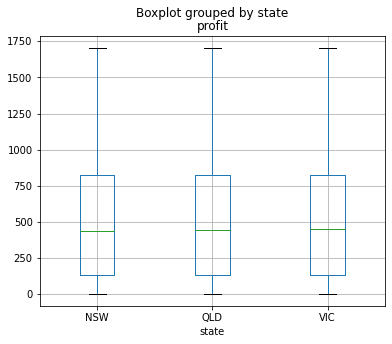

In [205]:
df_stats.boxplot(column='profit', by='state', figsize=(6,5));

*The descriptive stats show very similar results for the invidual states*

#### *OneWay Anova Using stats model on state column*

In [206]:
# performing one-way anova with stats column
stats.f_oneway(df_stats['profit'][df_stats['state'] == 'NSW'],
              df_stats['profit'][df_stats['state'] == 'QLD'],
              df_stats['profit'][df_stats['state'] == 'VIC'])

F_onewayResult(statistic=0.2622512957511298, pvalue=0.7693214408062258)

*Again the results show the means are not statistically significant hence **irrespective of the state from which the customers are from, the profit generated from what they purchase is not statistically significant**.*

*Again would want to known the statistical difference between each pair of state and whether they are significant of not using Tukey's HSD*

#### *Tukey's HSD on State Column*

In [207]:
# customers state tukey's test
state_comp = MultiComparison(df_stats['profit'], df_stats['state'])

# printing tukeys hsd from the multiple Comparison
print(state_comp.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   NSW    QLD   3.0004 0.9563  -21.694 27.6948  False
   NSW    VIC   7.2893 0.7509 -16.4016 30.9802  False
   QLD    VIC   4.2889 0.9336 -24.1927 32.7705  False
-----------------------------------------------------


*It appears there was no significant difference between any pair of the state hence the **profit generated by the organization is not affected by the state** of its customers*

### *Is the profit generated affected by the product brand?*
*Again this may require a one-way anova.*

In [208]:
# quick statistical description of the data
df_stats.groupby('brand')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,2343.0,471.568912,345.537667,41.13,198.22,448.68,641.64,1230.27
Norco Bicycles,2075.0,298.064516,254.498916,64.51,90.10,182.81,445.21,830.24
OHM Cycles,2162.0,482.725236,499.817584,4.80,91.15,199.10,771.12,1592.19
Solex,3042.0,565.533297,468.849529,17.87,179.44,437.46,751.02,1612.25
Trek Bicycles,2133.0,629.246315,604.535816,75.48,133.38,198.29,903.11,1702.55
WeareA2B,2291.0,835.801951,536.330668,15.08,155.65,834.94,1230.30,1660.88


*The descriptive stats shows very different results for the individual brands. lets have a visual representation of the data to get a better grasp of it*

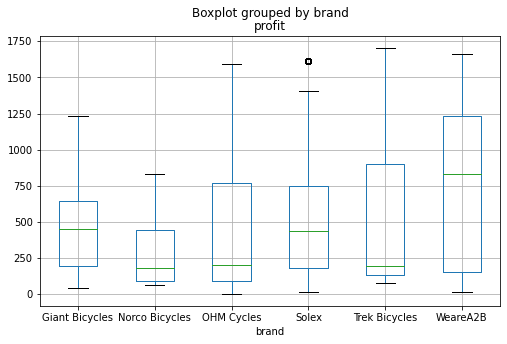

In [210]:
# Boxplt representation of brand distribution by profit
df_stats.boxplot(column='profit', by='brand', figsize=(8,5));

*There appears to be a huge difference in terms of profits from the individual brands of products available. But how significant are these differences?*

#### *One way Anova on Product Brands*

In [211]:
df_stats.brand.unique()

['OHM Cycles', 'Solex', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B']
Categories (6, object): ['Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B']

In [212]:
# performing one-way anova on brand column
stats.f_oneway(df_stats['profit'][df_stats['brand'] == 'Giant Bicycles'],
              df_stats['profit'][df_stats['brand'] == 'Solex'],
              df_stats['profit'][df_stats['brand'] == 'Trek Bicycles'],
              df_stats['profit'][df_stats['brand'] == 'OHM Cycles'],
              df_stats['profit'][df_stats['brand'] == 'Norco Bicycles'],
              df_stats['profit'][df_stats['brand'] == 'WeareA2B'])

F_onewayResult(statistic=327.7093846510485, pvalue=0.0)

*The p-value indicates the differences in the **profits generated by the individual brands are statistically significant** hence certain brands of the product generates more revenue fot he organization*

***How different are the profits between each pair of the brands. Lets find out using Tukey's hsd***

#### *Tukey's HSD on Product Brands*

In [213]:
# Performing Tukey's HSD
brand_comp = MultiComparison(df_stats['profit'], df_stats['brand'])

# printing out Turkey's hsd
print(brand_comp.tukeyhsd())

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------
Giant Bicycles Norco Bicycles -173.5044    0.0 -213.6157 -133.393   True
Giant Bicycles     OHM Cycles   11.1563 0.9674  -28.5247  50.8374  False
Giant Bicycles          Solex   93.9644    0.0     57.39 130.5387   True
Giant Bicycles  Trek Bicycles  157.6774    0.0  117.8563 197.4985   True
Giant Bicycles       WeareA2B   364.233    0.0  325.1373 403.3287   True
Norco Bicycles     OHM Cycles  184.6607    0.0  143.7684 225.5531   True
Norco Bicycles          Solex  267.4688    0.0  229.5837 305.3539   True
Norco Bicycles  Trek Bicycles  331.1818    0.0  290.1535 372.2101   True
Norco Bicycles       WeareA2B  537.7374    0.0  497.4129  578.062   True
    OHM Cycles          Solex   82.8081    0.0   45.3788 120.2373   True
    OHM Cycles  Trek Bicycles  146.5211    0.0  105

*But for the **Giant Bicycles** and **OHM Cycles** pair, all other pairs of brands seem to have a significant difference in terms of the profit generated. Hence, the **profit generated is highly affected by the product brand**.*

### *Does The Product Line Affect The Profit Generated?*
*Again, a one-way anova would be good for this analysis*

In [225]:
# quick statistical description of the data
df_stats.groupby('product_line')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
Mountain,296.0,95.869459,19.616007,75.75,75.75,114.93,114.93,114.93
Road,2838.0,357.651896,354.752867,4.80,129.01,189.28,450.77,1295.43
Standard,10078.0,574.453246,491.407686,14.23,143.82,451.65,827.16,1702.55
Touring,834.0,1093.100108,500.559127,139.23,1010.02,1305.25,1408.91,1630.25


*The stats displayed indicates **large difference in the profit generated by each product line**. Lets have a visual representation of this data using a boxplot*

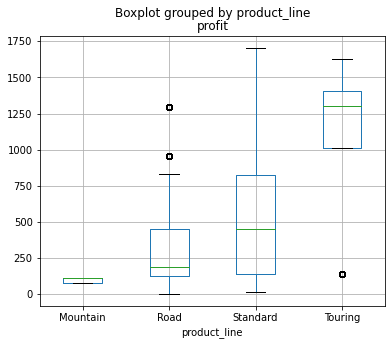

In [226]:
# boxplot of product line
df_stats.boxplot(column='profit', by='product_line', figsize=(6,5));

*The differences in the mean seem very different. But then how significant are thes differences? let s verify this with the one-way anova test*

#### *OneWay Anova on Product Line*

In [227]:
# performing one-way anova on product line
stats.f_oneway(df_stats['profit'][df_stats['product_line'] == 'Mountain'],
              df_stats['profit'][df_stats['product_line'] == 'Road'],
              df_stats['profit'][df_stats['product_line'] == 'Standard'],
              df_stats['profit'][df_stats['product_line'] == 'Touring'])

F_onewayResult(statistic=652.393551577228, pvalue=0.0)

*The p-value indicates the profits generated are statistically significant hence **profit generated is influenced by the the product_line** of the organization. Lets compute a multicomparison to see the interaction between each pair of product_line*

#### *Tukey's hsd*

In [228]:
# performing Multiple comparison test 
product_line_comp = MultiComparison(df_stats['profit'], df_stats['product_line'])

# printing out Tukey's hsd
print(product_line_comp.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj  lower     upper   reject
----------------------------------------------------------
Mountain     Road 261.7824   0.0 189.2533  334.3116   True
Mountain Standard 478.5838   0.0 408.5585  548.6091   True
Mountain  Touring 997.2306   0.0 916.8918 1077.5695   True
    Road Standard 216.8013   0.0 191.5674  242.0353   True
    Road  Touring 735.4482   0.0 688.6772  782.2193   True
Standard  Touring 518.6469   0.0 475.8613  561.4324   True
----------------------------------------------------------


*It appears the differences of the profit generated by each pair of product line is statistically significant thus, the **profit generated by the organization is greatly affected by the product line**.*

### *Does the product class affect the profit generated?*
*Again a one-way anova would suitable for this*

In [230]:
# Quick statistical view of data
df_stats.groupby('product_class')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
product_class,,,,,,,,
high,2181.0,371.724640,219.559314,4.80,198.29,409.86,509.97,802.26
low,2092.0,399.651228,459.871673,14.23,75.75,139.23,745.94,1544.61
medium,9773.0,623.920693,525.645375,15.08,143.82,502.47,1028.76,1702.55


*The stats displays varying results in the distribution of the product classes. How significant are these differences?*

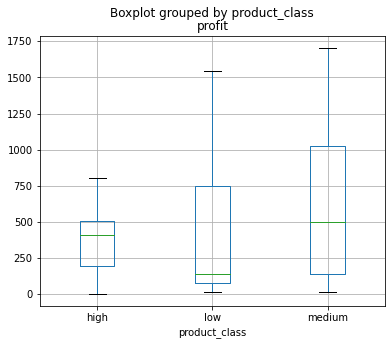

In [231]:
# Boxplot representation of data
df_stats.boxplot(column='profit', by='product_class', figsize=(6,5));

*The distributions seem very different from these box plots as seen earlier*

#### *OneWay Anova on Product Class*

In [232]:
# performing a one-way anova on product class
stats.f_oneway(df_stats['profit'][df_stats['product_class'] == 'high'],
              df_stats['profit'][df_stats['product_class'] == 'low'],
              df_stats['profit'][df_stats['product_class'] == 'medium'])

F_onewayResult(statistic=367.54193824483684, pvalue=2.6060261241509204e-156)

*The very small p-value indicates the mean of the profits generated by the different product classes is very significant. Thus, the **profit by the organization is statistically affected by the product class**.*

#### *Tukey's hsd*

In [234]:
# Multiple Comarison test on product Class
product_class_comp = MultiComparison(df_stats['profit'], df_stats['product_class'])

# Invoking and printing Tukey's hsd
print(product_class_comp.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  high    low  27.9266 0.1393  -6.5671  62.4203  False
  high medium 252.1961    0.0 225.5031  278.889   True
   low medium 224.2695    0.0 197.1163 251.4226   True
------------------------------------------------------


*It appears the differences in the **profit is more affected by the medium class products** whose mean profit seem to be statistically different from any other class of the product*

### *Is the profit generated affected by the product size?*
*Again, a one-way anova would do good in this regard*

In [235]:
# Quick stats view
df_stats.groupby('product_size')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
product_size,,,,,,,,
large,2808.0,921.546236,539.116964,4.80,445.21,957.02,1305.25,1702.55
medium,9202.0,528.736709,450.387584,14.23,133.38,450.77,802.26,1660.88
small,2036.0,143.046027,54.749527,43.97,75.75,152.55,189.28,217.51


*There appears to be large difference in the distribution of the product sizes by profit*

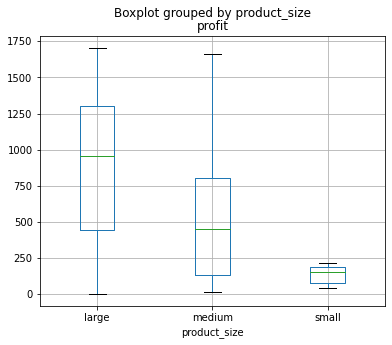

In [236]:
# boxplot of product size profit distribution
df_stats.boxplot(column='profit', by='product_size', figsize=(6,5));

*The differences in term of profits generated seem really different with each product size. But how significant are these differences?*

#### *OneWay Anova on Product Size*

In [237]:
# product size one way anova test
stats.f_oneway(df_stats['profit'][df_stats['product_size'] == 'large'],
              df_stats['profit'][df_stats['product_size'] == 'medium'],
              df_stats['profit'][df_stats['product_size'] == 'small'])

F_onewayResult(statistic=1903.894786147917, pvalue=0.0)

*The results indcate the profit means for the individual product sizes are statistically very different. Hence, the **profit by the organization is affected by the prices of the product**.*

#### *Tukey's hsd*

In [238]:
# performing Mulitple comparison test on product size
product_size_comp = MultiComparison(df_stats['profit'], df_stats['product_size'])

# invoking and printing tukey's hsd
print(product_size_comp.tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
 large medium -392.8095   0.0 -414.9198 -370.6993   True
 large  small -778.5002   0.0 -808.3524  -748.648   True
medium  small -385.6907   0.0 -410.8082 -360.5732   True
--------------------------------------------------------


*It appears the differences in the **profit generated by each product size pair is statistically significant**. Hence we can say the a products size affects the organizations profit*

### *Two-Way Analysis of Variance*

### *How Does The Interferance of Gender and Brand  Of a Product Affect The Profit Generated?*
*A two way ananlysis of variance would help in this quest*

In [240]:
# Quick descriptive summary of brand by profit
rp.summary_cont(df_stats.groupby(['brand'])['profit'])

,N,Mean,SD,SE,95% Conf.,Interval
brand,,,,,,
Giant Bicycles,2343,471.5689,345.5377,7.1385,457.5704,485.5674
Norco Bicycles,2075,298.0645,254.4989,5.5870,287.1078,309.0212
OHM Cycles,2162,482.7252,499.8176,10.7494,461.6450,503.8055
Solex,3042,565.5333,468.8495,8.5007,548.8656,582.2010
Trek Bicycles,2133,629.2463,604.5358,13.0896,603.5766,654.9160
WeareA2B,2291,835.8020,536.3307,11.2052,813.8285,857.7754


*We know from previous tests that the differences in the means are statistically significant*

In [241]:
# Quick descriptive summary of gender by profit
rp.summary_cont(df_stats.groupby(['gender'])['profit'])

,N,Mean,SD,SE,95% Conf.,Interval
gender,,,,,,
Female,7127,545.5916,491.5673,5.8228,534.1772,557.0060
Male,6919,557.2984,494.9759,5.9506,545.6333,568.9634


*Results from previous test shows the mean of this data is not statistically significant*

#### *Regression Analysis*
*Before performing the two-way anova, we would need some regeression analysis which would inform us on the linear relationship on the variables involved*

#### *Regression analysis of profit on brand*
*This would inform us on the influence of the different brands on profit*

In [242]:
# Performing ols regression on brand and profit
brand_model =  ols('profit ~ C(brand)', df_stats).fit()

# invoking and printing the summary of the model generated
print(brand_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     327.7
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:55:01   Log-Likelihood:            -1.0625e+05
No. Observations:               14046   AIC:                         2.125e+05
Df Residuals:                   14040   BIC:                         2.126e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

*The result indicates that the regression is significant based on th f-statistic. This informs us that, about **10%** of the profit generated is as a result of the variation in product brands and that the coefficient associated with the regression of the **OHM CYCLES** is not significant*

#### *Regression analysis of gender on profit*
*This informs us on the influence of gender on the profit generated by the organization*

In [243]:
# Performing ols regression on gender and profit
gender_model =  ols('profit ~ C(gender)', df_stats).fit()

# invoking and printing the summary of the model generated
print(gender_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.978
Date:                Tue, 06 Sep 2022   Prob (F-statistic):              0.160
Time:                        13:47:24   Log-Likelihood:            -1.0703e+05
No. Observations:               14046   AIC:                         2.141e+05
Df Residuals:                   14044   BIC:                         2.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           545.5916      5.84

*It appears the regression is not significant based on the f-statistics. The t-statistics further informs us that coefficient of the female regression is statistically significant while that of the male is not. The r-squared value **indicates no profit was generated as a result of the variation in gender**.*

#### *Regression analysis of both (brand and gender) without interaction between them*
*This analysis would not take into account the interaction between the two groups involved here. In other words, it would not consider the influence of one group on the other*

In [244]:
# Performing regression analysis on brand and gender
brand_gender_model = ols('profit ~ C(brand) + C(gender)', df_stats).fit() # does not take into account the interaction between the two

# print summary of result
print(brand_gender_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     273.8
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:40:57   Log-Likelihood:            -1.0625e+05
No. Observations:               14046   AIC:                         2.125e+05
Df Residuals:                   14039   BIC:                         2.126e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

*The **regression seems significant** considering the f-statistics. The coefficients of the relationship between the **pairs containing the OHM Cycles and the Male seem not be significant** per the result. It therefore appears that about **10%** of the profit generated is as a result of the brands and gender without taking into account the interaction between them*

#### *Two-Way Anova Test on Brand and Gender Without Interaction Between Them*
*At this moment, we can perform anova test on any of our models above*

In [245]:
# anova test on brand and gender model without interaction between them
sm.stats.anova_lm(brand_gender_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(brand),5.0,3.571396e+08,7.142792e+07,327.772823,0.000000
C(gender),1.0,8.101952e+05,8.101952e+05,3.717873,0.053853
Residual,14039.0,3.059365e+09,2.179190e+05,NaN,NaN


*The p-values informs us that the differences in mean of the profit generatd by the different brands are significant  while that of the different gender groups are not significant. At the moment what we've not considered is the interaction between the two groups.*

#### *Regression Analysis considering the interaction between the Brands and the Gender groups*
*We would at this instance perform a regression analysis involving the interaction between the two categories*

In [247]:
# regression analysis on brand and gender considering interaction between them
brand_gender_inter_model = ols('profit ~ C(brand) * C(gender)', df_stats).fit() # the * symobol ensures interaction b/t the categories

# printing out summary of the model
print(brand_gender_inter_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     149.9
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:            -1.0625e+05
No. Observations:               14046   AIC:                         2.125e+05
Df Residuals:                   14034   BIC:                         2.126e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

*The f-statistics proves **the regression is not significant** for this model as well. This implies the relationship between the interaction of the brands and gender is not significant. It appears **any pair that consists of the male gender as well as the OHM Cycles has an insignificant coefficient**. Now that we've taken into account the interaction let's perform our anova test on this model as well*

#### *Anova Test on Brand and Gender Interaction Model*

In [249]:
# anova test on brand and gender model considering interaction
sm.stats.anova_lm(brand_gender_inter_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(brand),5.0,3.571396e+08,7.142792e+07,327.809920,0.000000
C(gender),1.0,8.101952e+05,8.101952e+05,3.718294,0.053839
C(brand):C(gender),5.0,1.435694e+06,2.871387e+05,1.317789,0.253119
Residual,14034.0,3.057929e+09,2.178943e+05,NaN,NaN


*This result informs us on the significance of the  profit means between the categories within the two groups of which we already aware of at this point. The results of the probability f-statistics for the combined groups informs us that their influence on each other is not significant. Hence the **relationship between brand and gender has no significant influence on the profit generated by the organization**.*

### *Chi-Square Test*

### *Does the product line affect the property valuation?*
*We would want to find out whether the property valuation of product is associated with the product line. A chi2 test would seem suitable for this analysis*

In [102]:
# Quick statistical view of the two groups
df_stats[['property_valuation', 'product_line']].sample(5)

,property_valuation,product_line
6289,8,Standard
2629,6,Road
8918,4,Standard
13967,7,Standard
1073,8,Standard


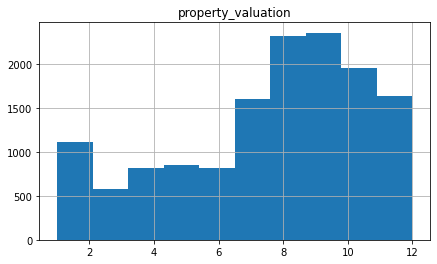

In [152]:
# Quick view of distribution of property valuation
df_stats[['property_valuation']].hist(figsize=(7, 4));

*It appears most of the products are valued between **7** to **12**.*

In [124]:
# distribution of product line to product valuation
obs_val_line = pd.crosstab(df_stats['product_line'], df_stats['property_valuation'])
obs_val_line

property_valuation,1,2,3,4,5,6,7,8,9,10,11,12
product_line,,,,,,,,,,,,
Mountain,12,13,17,16,29,21,28,41,45,41,19,14
Road,119,101,110,156,179,158,325,466,476,412,201,135
Standard,418,391,417,589,590,600,1143,1657,1695,1400,700,478
Touring,35,30,38,52,50,39,105,154,142,100,62,27


*A **chi2 contingency test** on the result above gives us information on whether the property valuation was dependant on product line or not*

In [125]:
# performing a chi2 contingency test
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(obs_val_line.values)

*The expected_values gives us the values for how chi2 expects the data to be distributed if the product lines are independent of the ratings*

In [126]:
print('chi2 stats: {}'.format(round(p_value, 3)))

chi2 stats: 0.684


In [127]:
print('p-value: {}'.format(p_value))

p-value: 0.6841778367990352


*The result of the p-value informs us that the expected chi2 disribution was not significant, in other words, the chi2 distribution was not any different from the observed distribution*

In [128]:
print('degrees of freedom: {}'.format(degrees_of_freedom))

degrees of freedom: 33


In [129]:
print('expected values: {}'.format(expected_values))

expected values: [[  12.30699131   11.27438417   12.26484408   17.13284921   17.87042574
    17.23821729   33.73885804   48.84864018   49.69158479   41.15677061
    20.69429019   13.78214438]
 [ 117.99743699  108.09696711  117.59333618  164.26697992  171.33874413
   165.27723195  323.4826997   468.35284067  476.4348569   394.60444255
   198.4134985   132.1409654 ]
 [ 419.01979211  383.86230955  417.58479282  583.32721059  608.43969813
   586.91470881 1148.71693009 1663.16417485 1691.86416062 1401.27680478
   704.58465043  469.24476719]
 [  34.67577958   31.76633917   34.55702691   48.27296027   50.35113199
    48.56984195   95.06151217  137.6343443   140.00939769  115.96198206
    58.30756087   38.83212302]]


*The expected values tells us how chi2 expected the various property valuation values to be distributed. The different rows informs us of this specific information for the various product line categories*

*We would want to convert this into a pandas dataframe to view the distribution of the expected outcome*

In [130]:
expected_li_val_df = pd.DataFrame({'Mountain':expected_values[0], 
                                   'Road':expected_values[1], 
                                   'Standard':expected_values[2], 
                                   'Touring':expected_values[3]}
                                 )
expected_li_val_df

,Mountain,Road,Standard,Touring
0,12.306991,117.997437,419.019792,34.675780
1,11.274384,108.096967,383.862310,31.766339
2,12.264844,117.593336,417.584793,34.557027
3,17.132849,164.266980,583.327211,48.272960
4,17.870426,171.338744,608.439698,50.351132
5,17.238217,165.277232,586.914709,48.569842
6,33.738858,323.482700,1148.716930,95.061512
7,48.848640,468.352841,1663.164175,137.634344
8,49.691585,476.434857,1691.864161,140.009398
9,41.156771,394.604443,1401.276805,115.961982


#### *Visualization of the expected product line to property valuation*
*A graph of the expected distribution of the product line with respect to the product valuation using a bar chart*

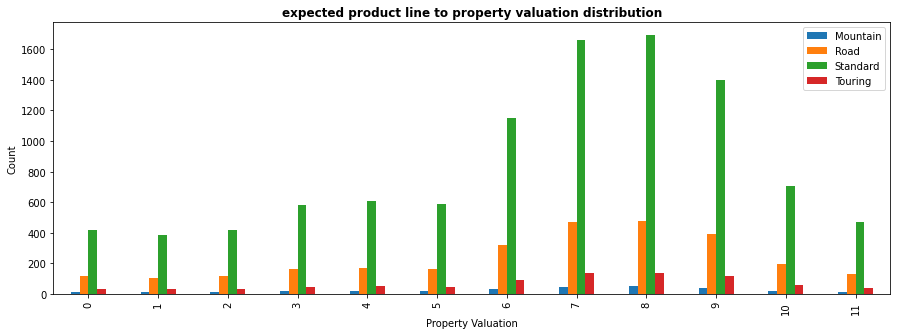

In [175]:
# expected value distribution for product line and property valuation
expected_li_val_df.plot(kind='bar', figsize=(15, 5), stacked=False);
plt.title('expected product line to property valuation distribution', fontweight='bold');
plt.xlabel('Property Valuation');
plt.ylabel('Count');

*The expected distribution graph looks somehow similar to the distribution of the property valuation earlier but this time peaking from property valuation values of **7** to **10** for all product lines. It should be noted **0** represents the first property valuation value and **11** represents the **12** valuation value.*

#### *Observed Property valuation values to Product Lines*
*We would set up different dataframes for each product line observation*

In [160]:
# setting ud DataFrames for each product line observation
Mountain = df_stats[df_stats['product_line'] == 'Mountain']
Road = df_stats[df_stats['product_line'] == 'Road']
Standard = df_stats[df_stats['product_line'] == 'Standard']
Touring = df_stats[df_stats['product_line'] == 'Touring']

In [161]:
print(Mountain.shape)
print(Road.shape)
print(Standard.shape)
print(Touring.shape)

(296, 14)
(2838, 14)
(10078, 14)
(834, 14)


In [163]:
# Quick view of the property valuation values for the mountain product lines
Mountain.property_valuation.sample(10)

7282      8
9580      6
6270     12
4120      7
7088      5
13081     8
1381      7
3513      3
4948      4
5678      4
Name: property_valuation, dtype: int64

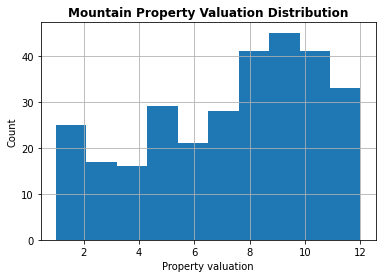

In [177]:
# distribution of mountain product line property valuations
Mountain[['property_valuation']].hist();
plt.title('Mountain Property Valuation Distribution', fontweight='bold');
plt.xlabel('Property valuation');
plt.ylabel('Count');

In [164]:
# Quick view of the property valuation values for the Road product lines
Road.property_valuation.sample(10)

2320      9
5084      9
11458    10
12517    12
4101      9
8779      6
8858      9
2343      7
2378      8
6930     10
Name: property_valuation, dtype: int64

*It appears most products in the road product lines have fairly large product lines*

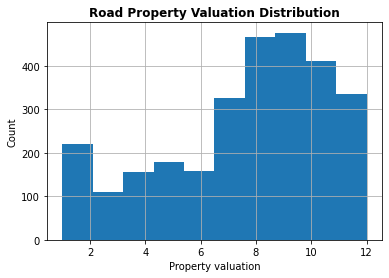

In [178]:
# distribution of Road product line property valuations
Road[['property_valuation']].hist();
plt.title('Road Property Valuation Distribution', fontweight='bold');
plt.xlabel('Property valuation');
plt.ylabel('Count');

In [166]:
# Quick view of the property valuation values for the standard product lines
Standard.property_valuation.sample(10)

2490     11
12859    10
1124      7
2675      9
3091     10
7790      8
8331      2
4297      9
10308     9
11592     6
Name: property_valuation, dtype: int64

*Most products with standard product lines also have fairly large product valuation values*

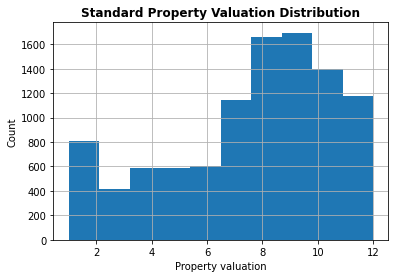

In [179]:
# distribution of Standard product line property valuations
Standard[['property_valuation']].hist();
plt.title('Standard Property Valuation Distribution', fontweight='bold');
plt.xlabel('Property valuation');
plt.ylabel('Count');

In [167]:
# Quick view of the property valuation values for the Touring product lines
Touring.property_valuation.sample(10)

3609      2
12609     5
284       9
10982    12
8119      5
11539     8
8715      2
4066      9
11269    11
6079      4
Name: property_valuation, dtype: int64

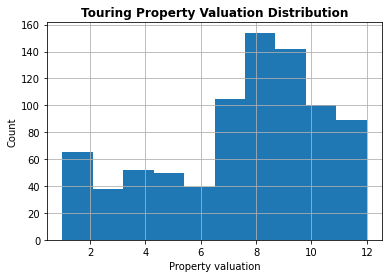

In [180]:
# distribution of Touring product line property valuations
Touring[['property_valuation']].hist();
plt.title('Touring Property Valuation Distribution', fontweight='bold');
plt.xlabel('Property valuation');
plt.ylabel('Count');

*Again, it appears product valuation distribution for the Touring product line category peaks with the **7** to **12** product valuation values*

*It somehow assumes **the property valuation values are independent of product lines** looking at its distributions in the various product line categories*

### Relationships observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?<a id='robs'></a>
> * *People within finance, health and manufacturing were more likely to purchase products*
> * *But for the listing price, profit seem not to be affected by any other variable*
> * *Most profits generated fall within the **\$200**.*
> * *Customers within their **40's** seem to have generated the greater chunk of the profits which was more likely to be as a result of their advantage in number.*
> * *Profits are widely dispersed among the various **age groups** accounting for the large standard deviations within the various categories in terms of profits generated.*
> * *It appears **any pair that consists of the male gender as well as the OHM Cycles has an insignificant coefficient** for a regression analysis on Gender and product Brand*
> * *The **Product** line is not dependent on **property valuation**.*
> * *The differences in the profits generated by the individual **product brands**, **product sizes** and **product lines** are significant*
> * *The effect on the profit generated by the interaction between **product brand** and **gender** is insignificant*

### *Interesting Findings*<a id='intfin'></a>
>* *The **mean profit** made for the various age groups were very close.*
>* *There is no correlation between **profit** and **age**.*
>* *Profit made is not affected by Gender*
>* *Profit generated was not affected by the past 3 years bike related purchases*

### *Conclusion*<a id='concl'></a>

*It would benefit the organization most if it channeles its advertising resources on:*
>* *People in their **40's** as they seem more interested in the organizations products*
>* *The product brands with the high mean profits such as the **WeareA2B**.*
>* *People in the **Financing Services**, **Marketing** and **Health** Sectors should be prioritized most*
>* *Also, more resources should be chanelled towards the **large product sizes**.*
>* *The **Product classes of the medium type** should as well be prioritized over others since most customers seem to prioritize this classes of products and also its influence on the overall profit of the organization since it's significant compared to the others.*
>* *The **Touring and Standard product lines** should be considered most. But a greater priority for the Standardard product lines since more people seem to be interested then the Touring type due to its high profit margin which is significant compared to the others*